In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import wasserstein_distance

In [5]:
# Modify these parameters to run the script
M_path = 'simulated_data/experiment_noise_1/data_v1_GRCh37_4_6_7a_9_18.csv'
decomposed_matrices_folder = 'outputs/signature_matrices_passing_v1_exp2'
ground_truth_path = 'cosmic_signatures/COSMIC_v3.4_SBS_GRCh37.txt'
k = 5
rep = 31
W_path = f"{decomposed_matrices_folder}/D_k{k}_run{rep}.csv"

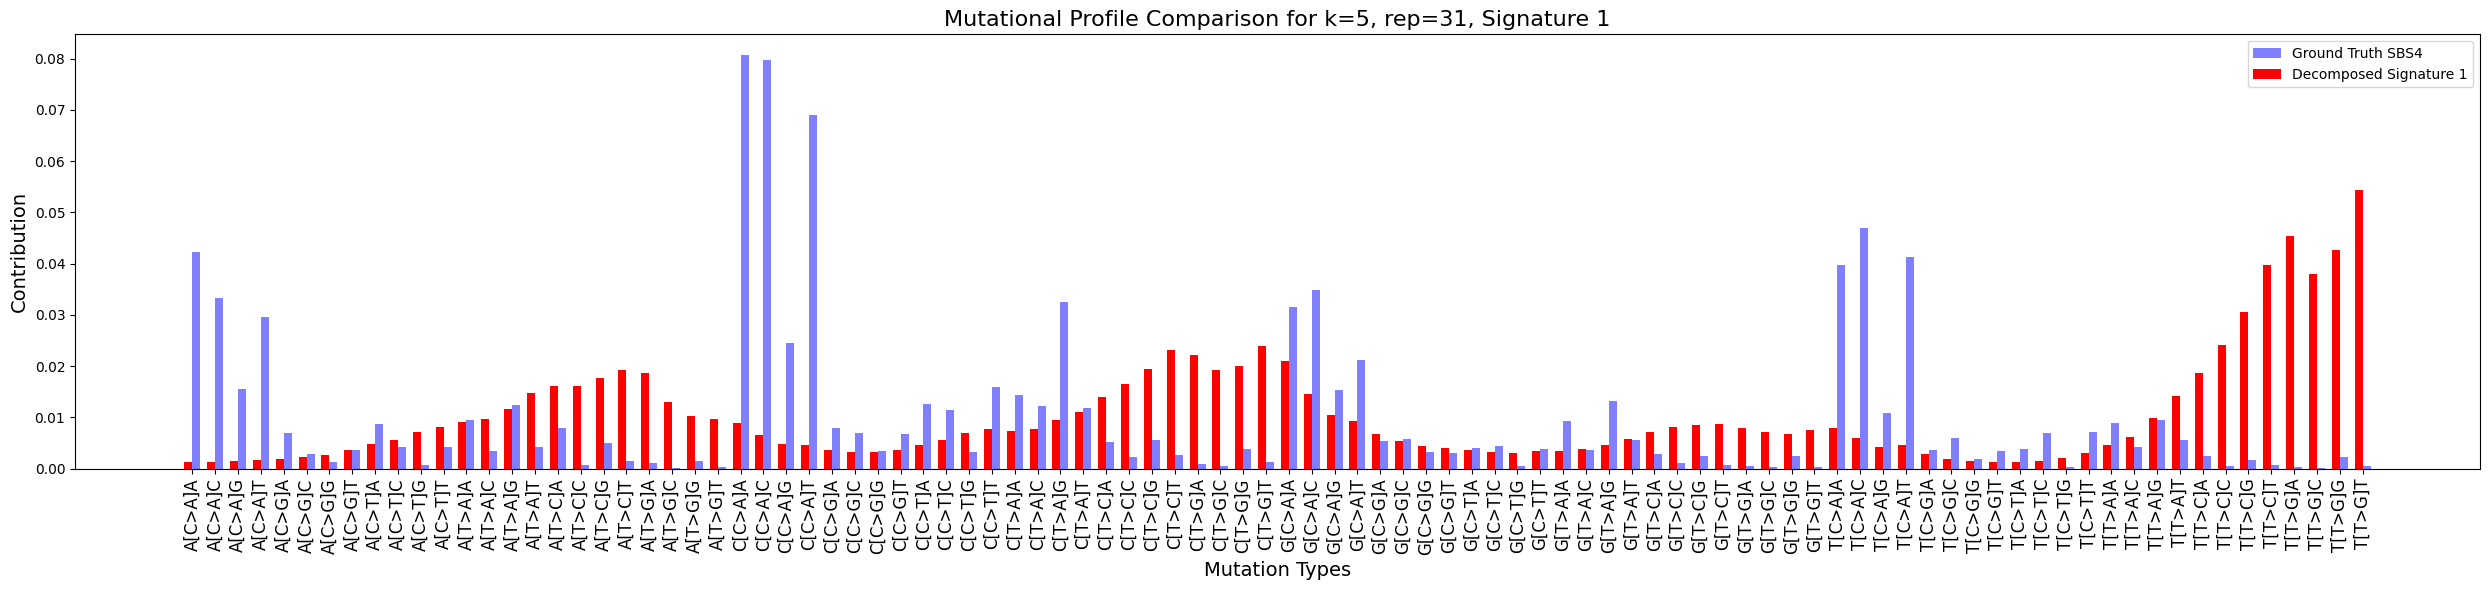

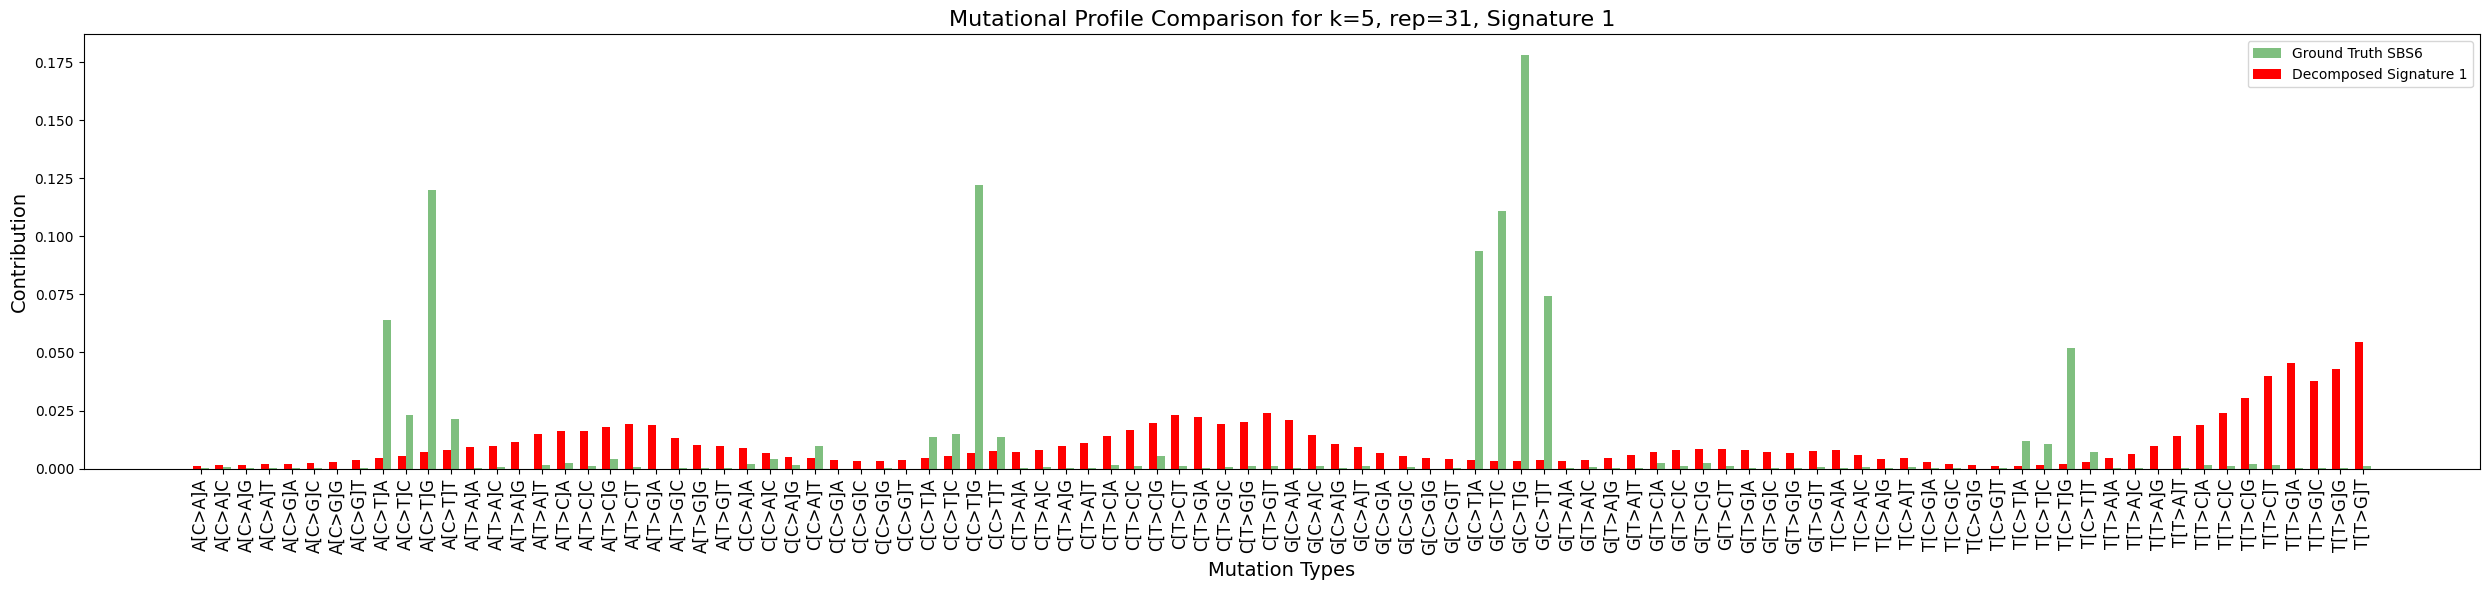

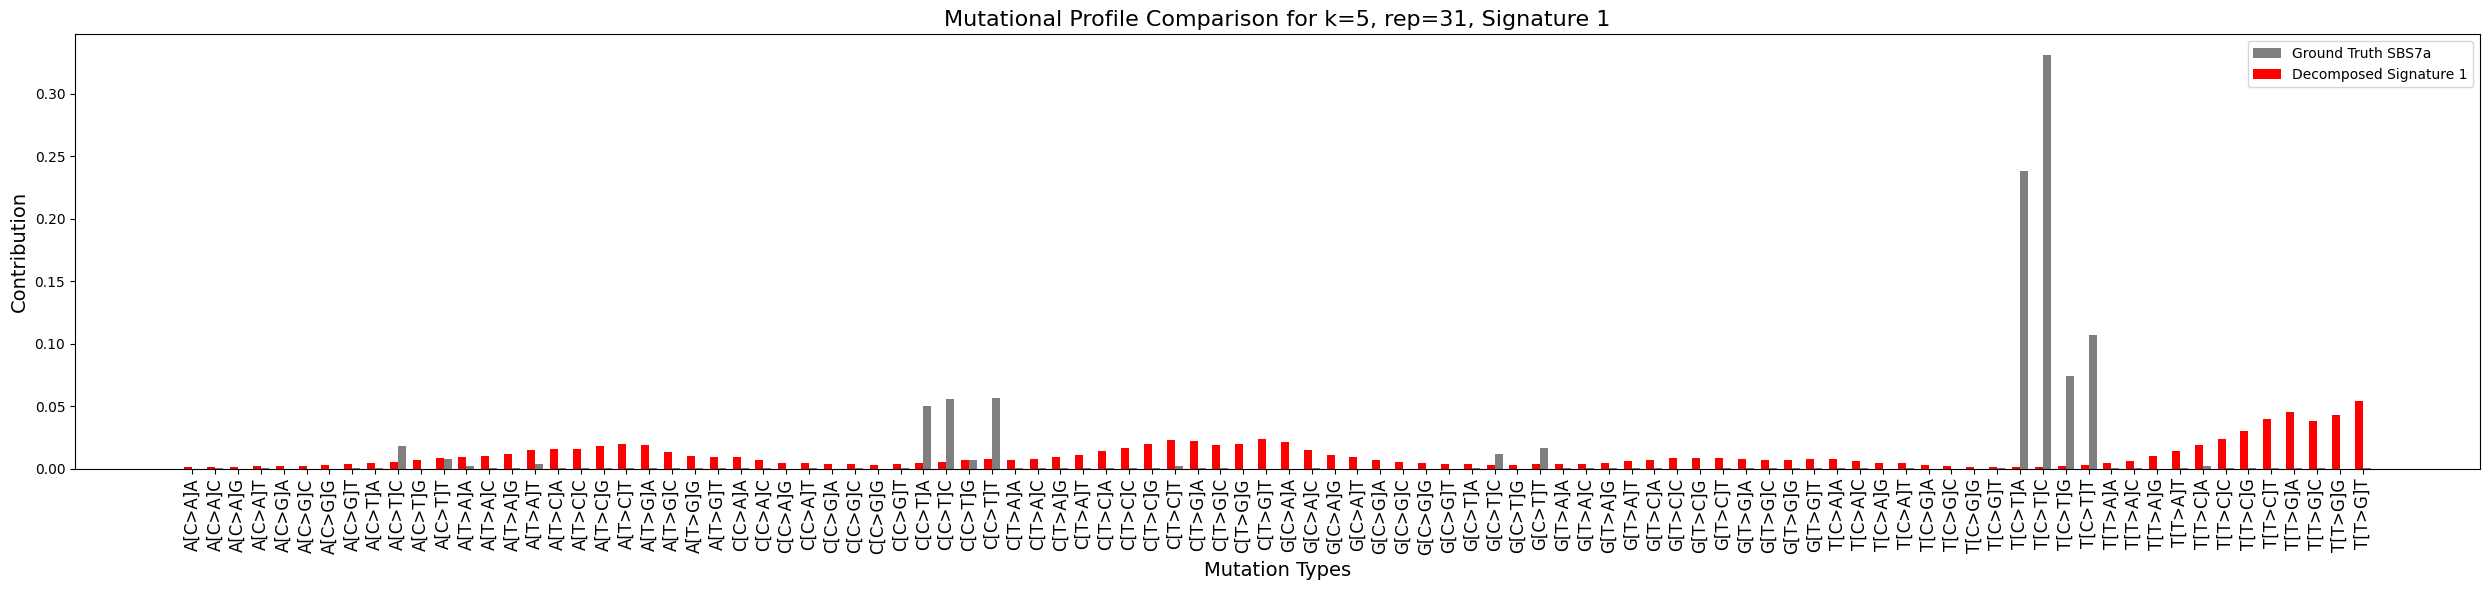

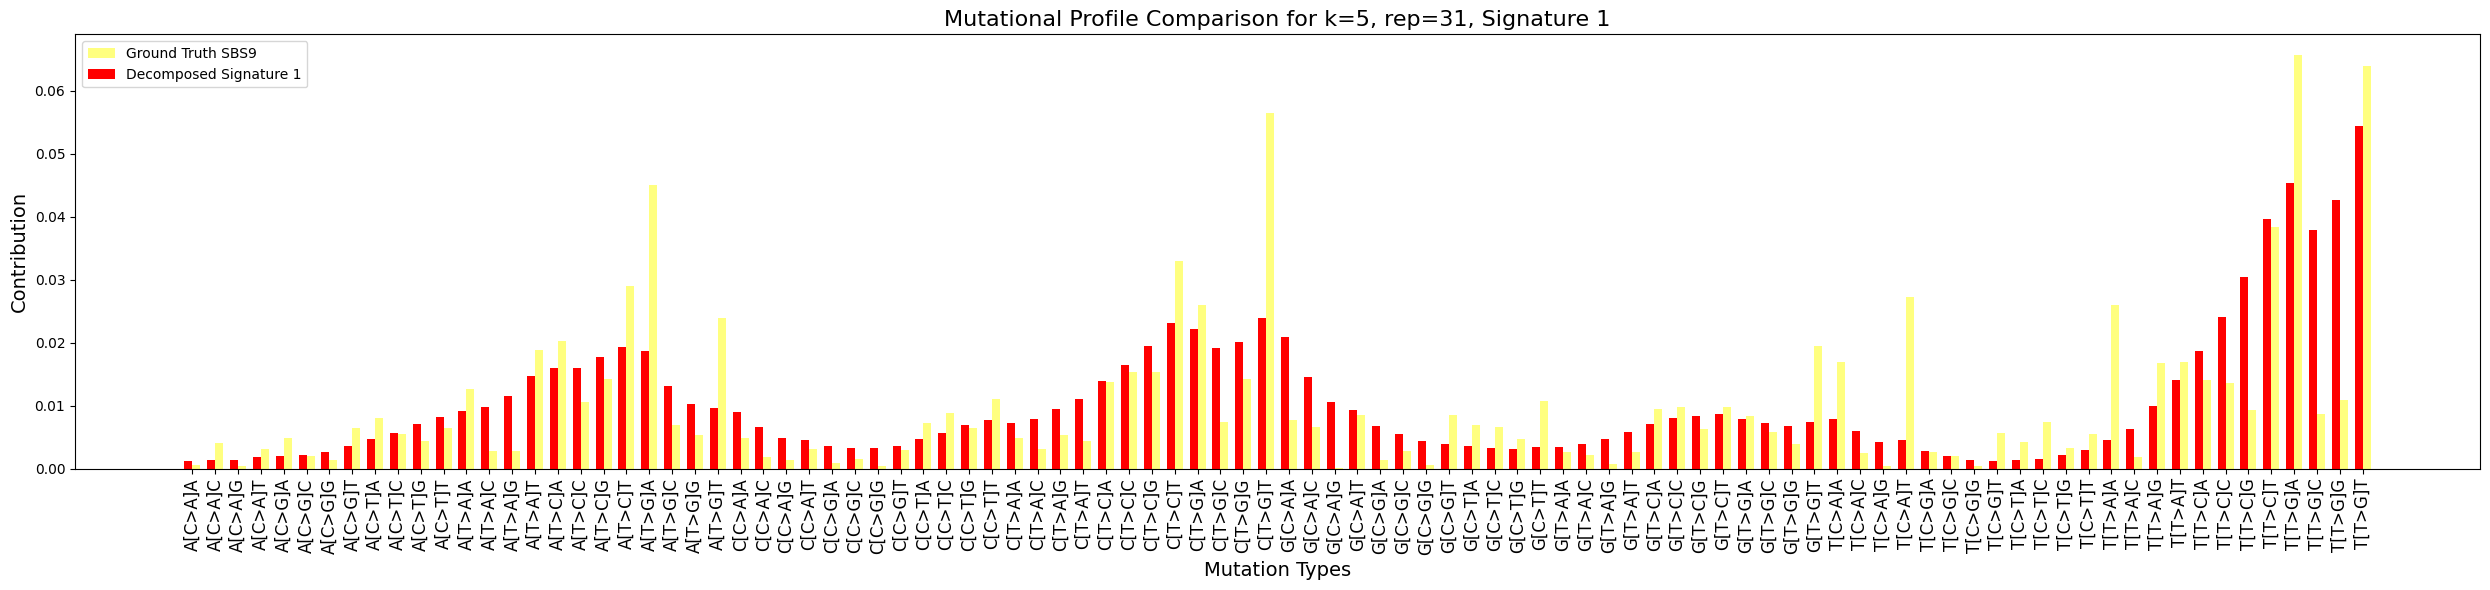

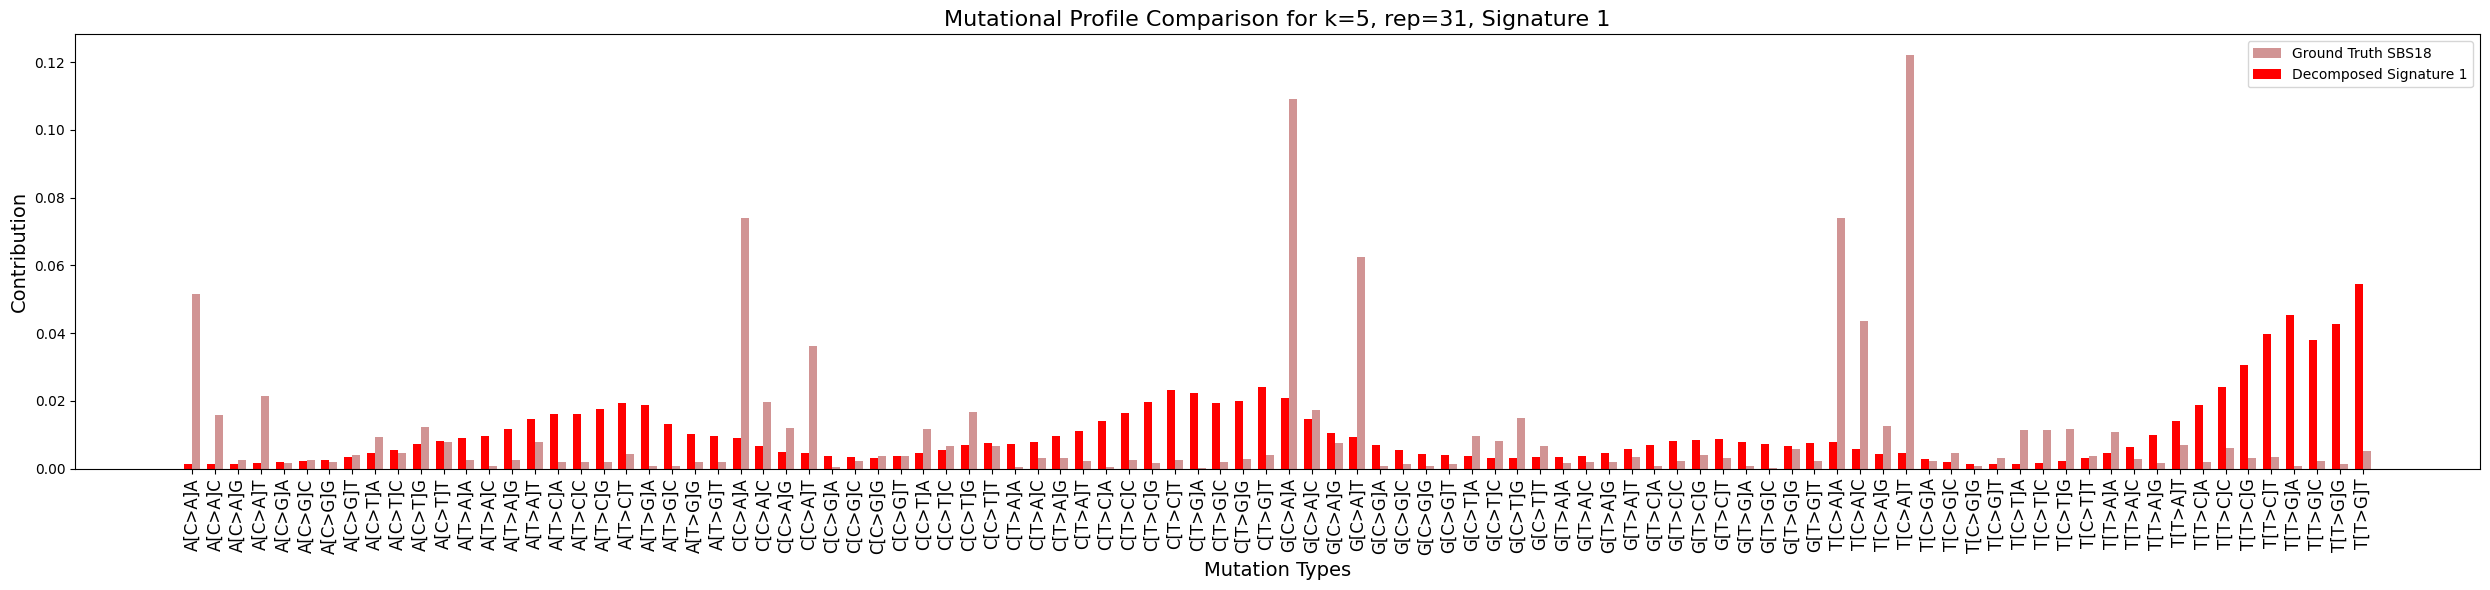

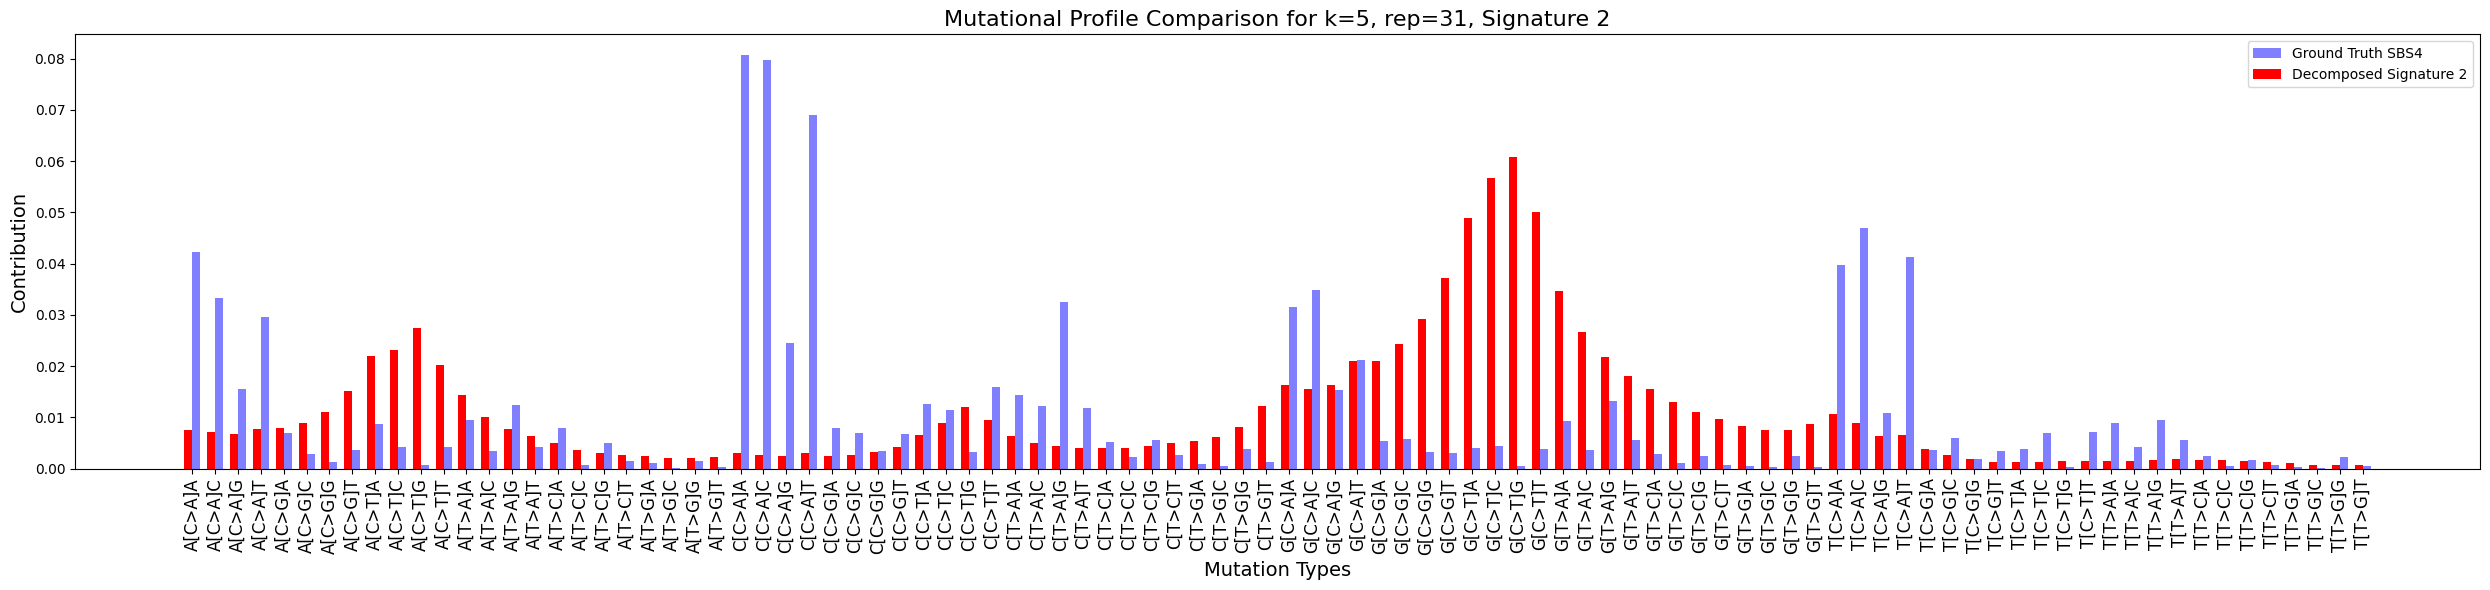

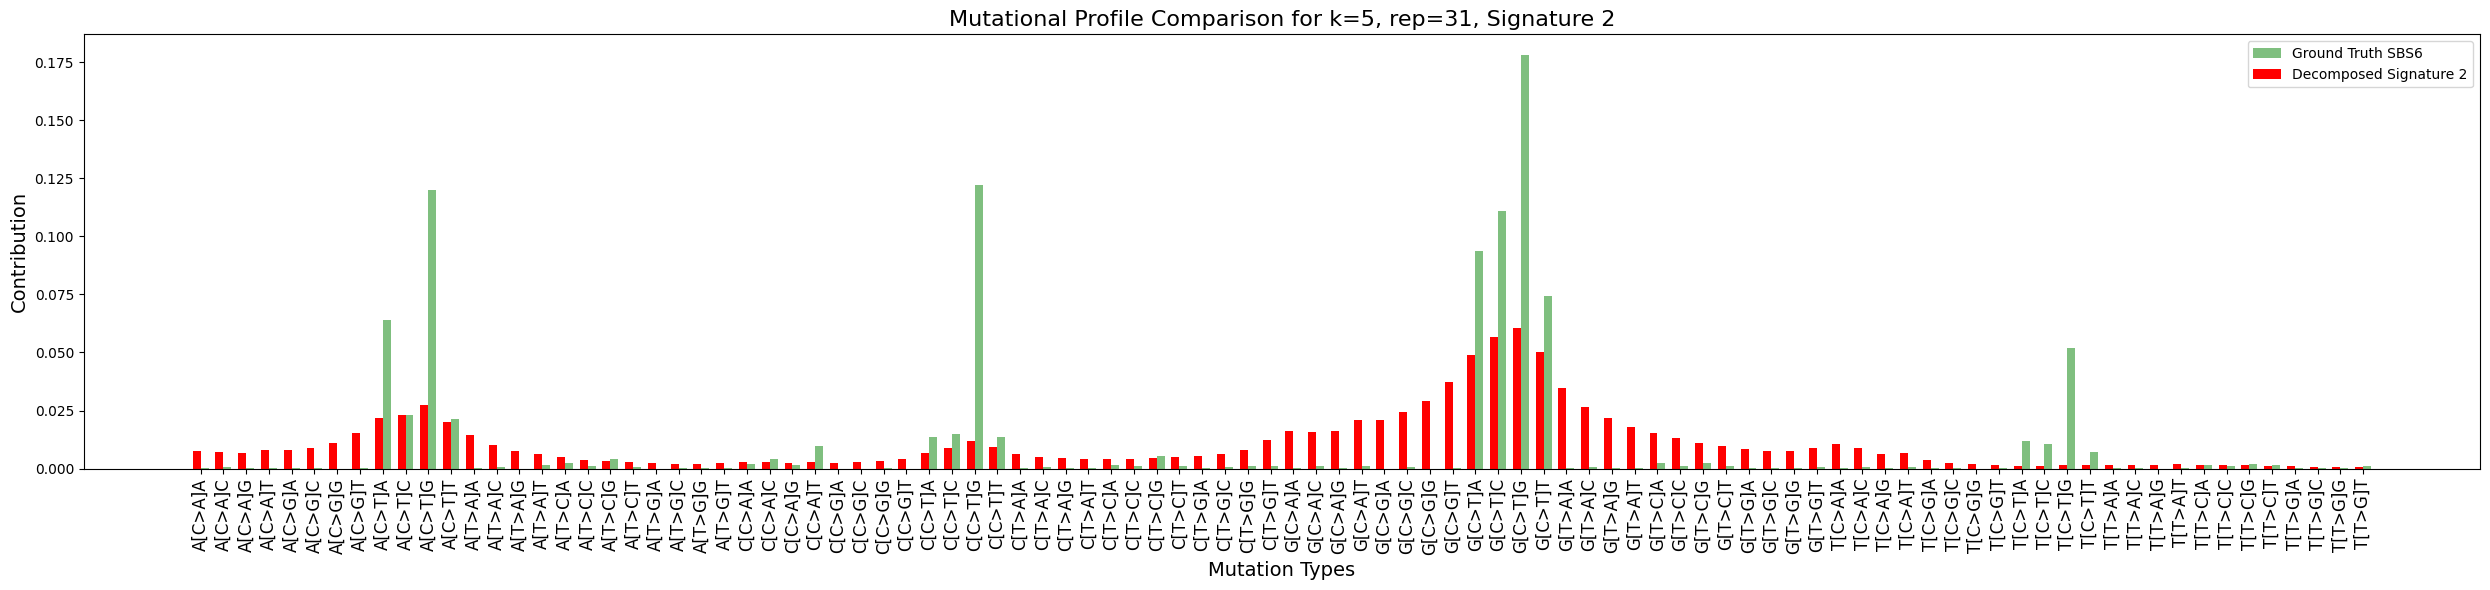

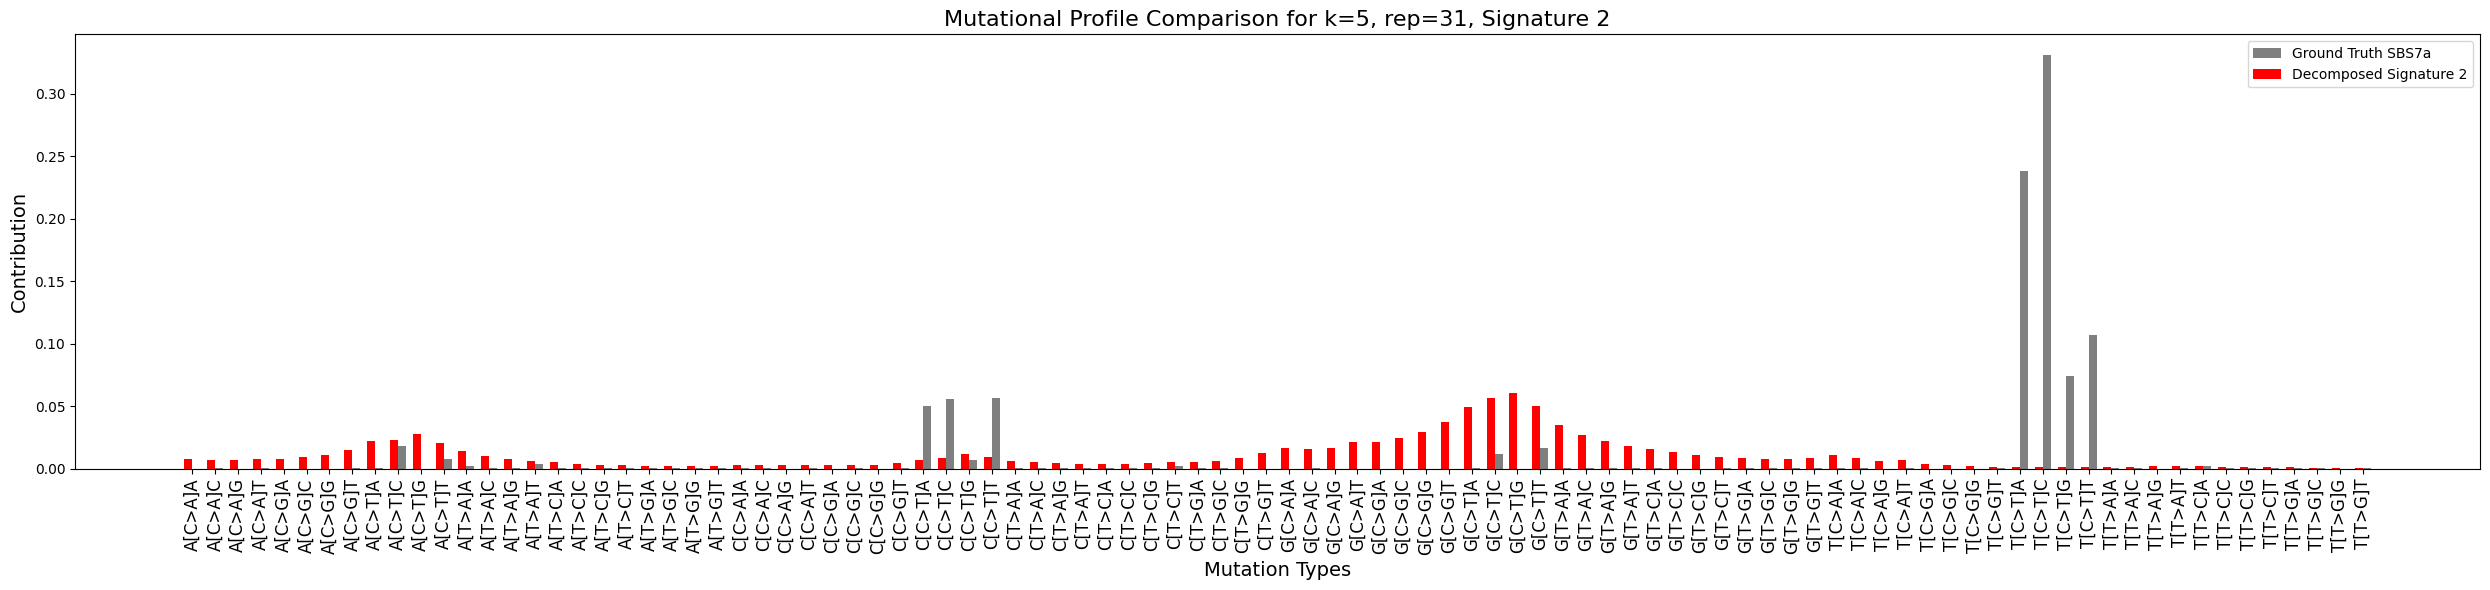

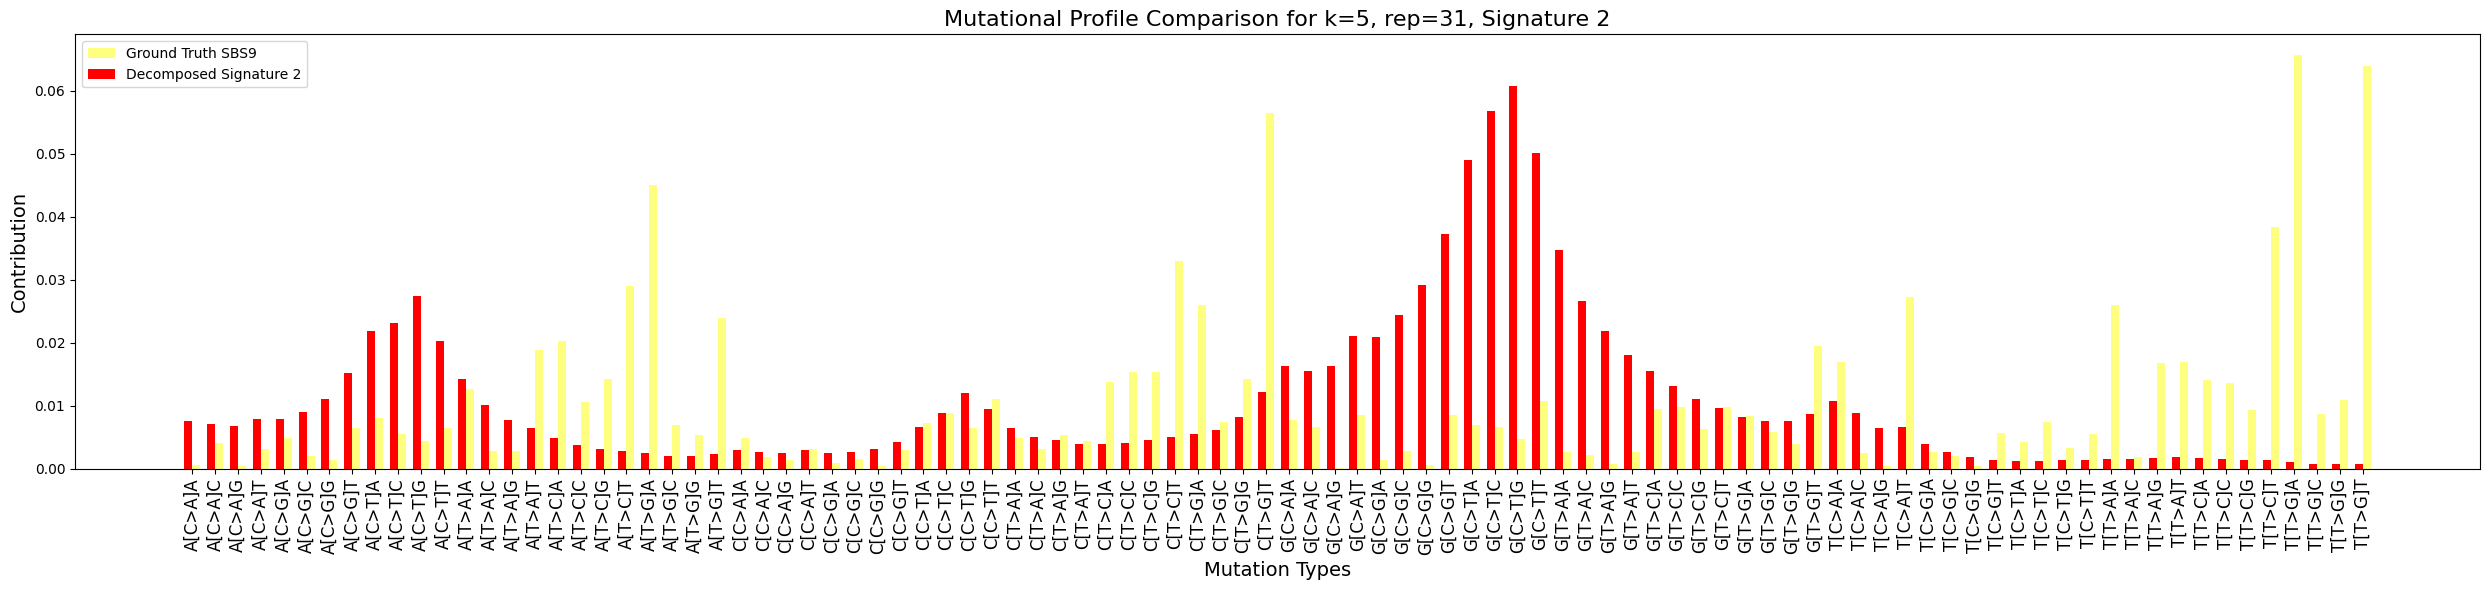

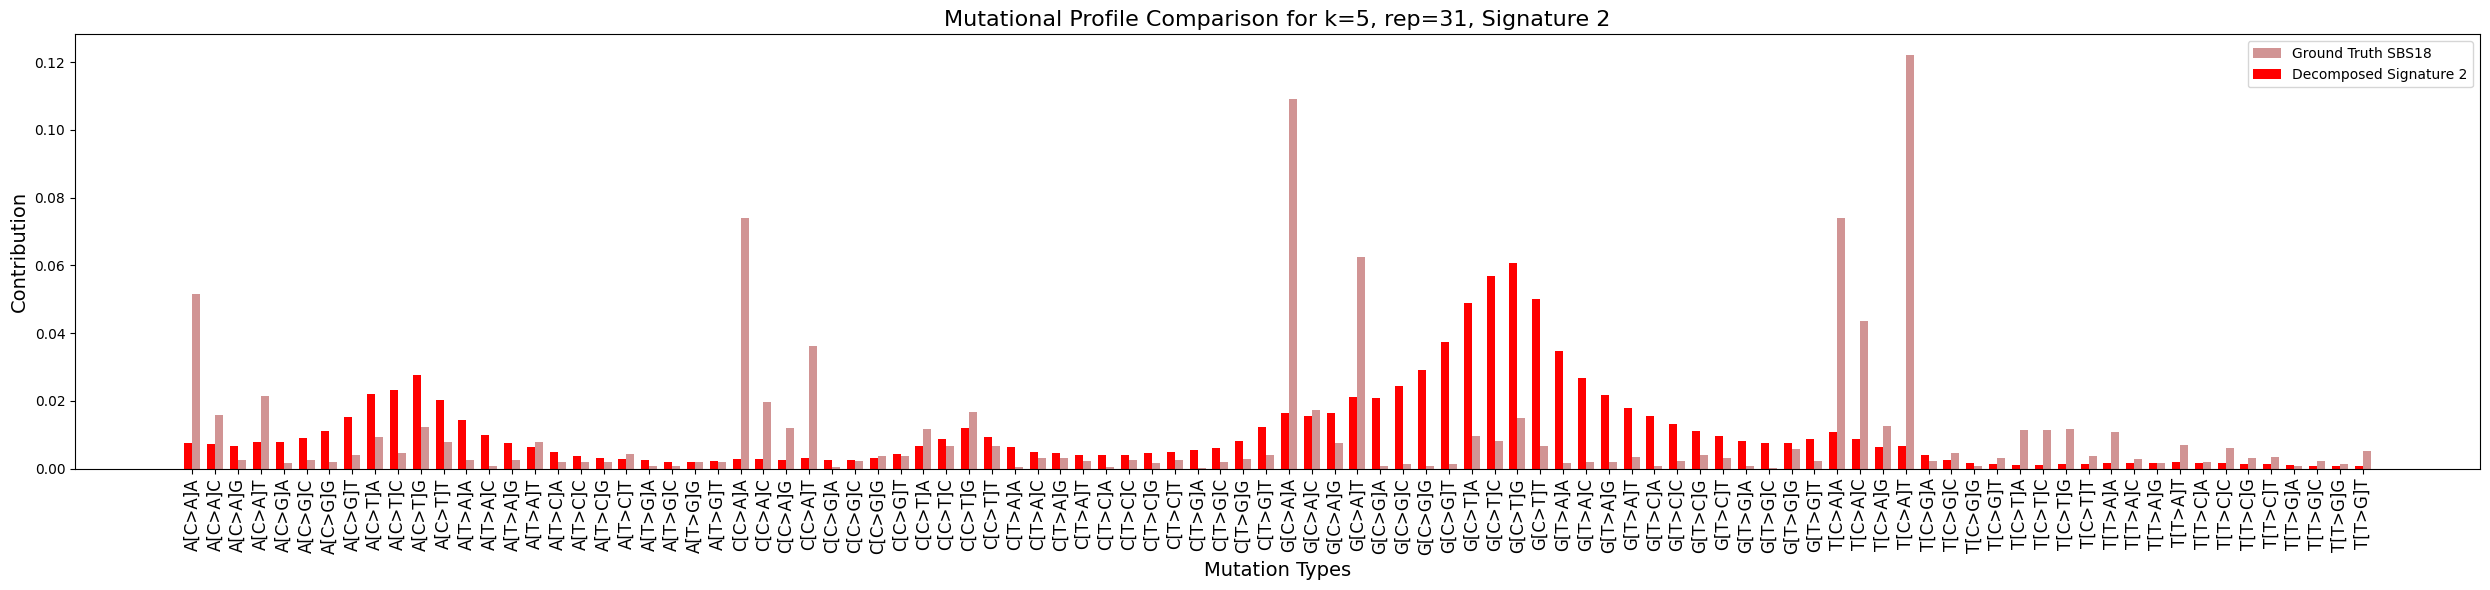

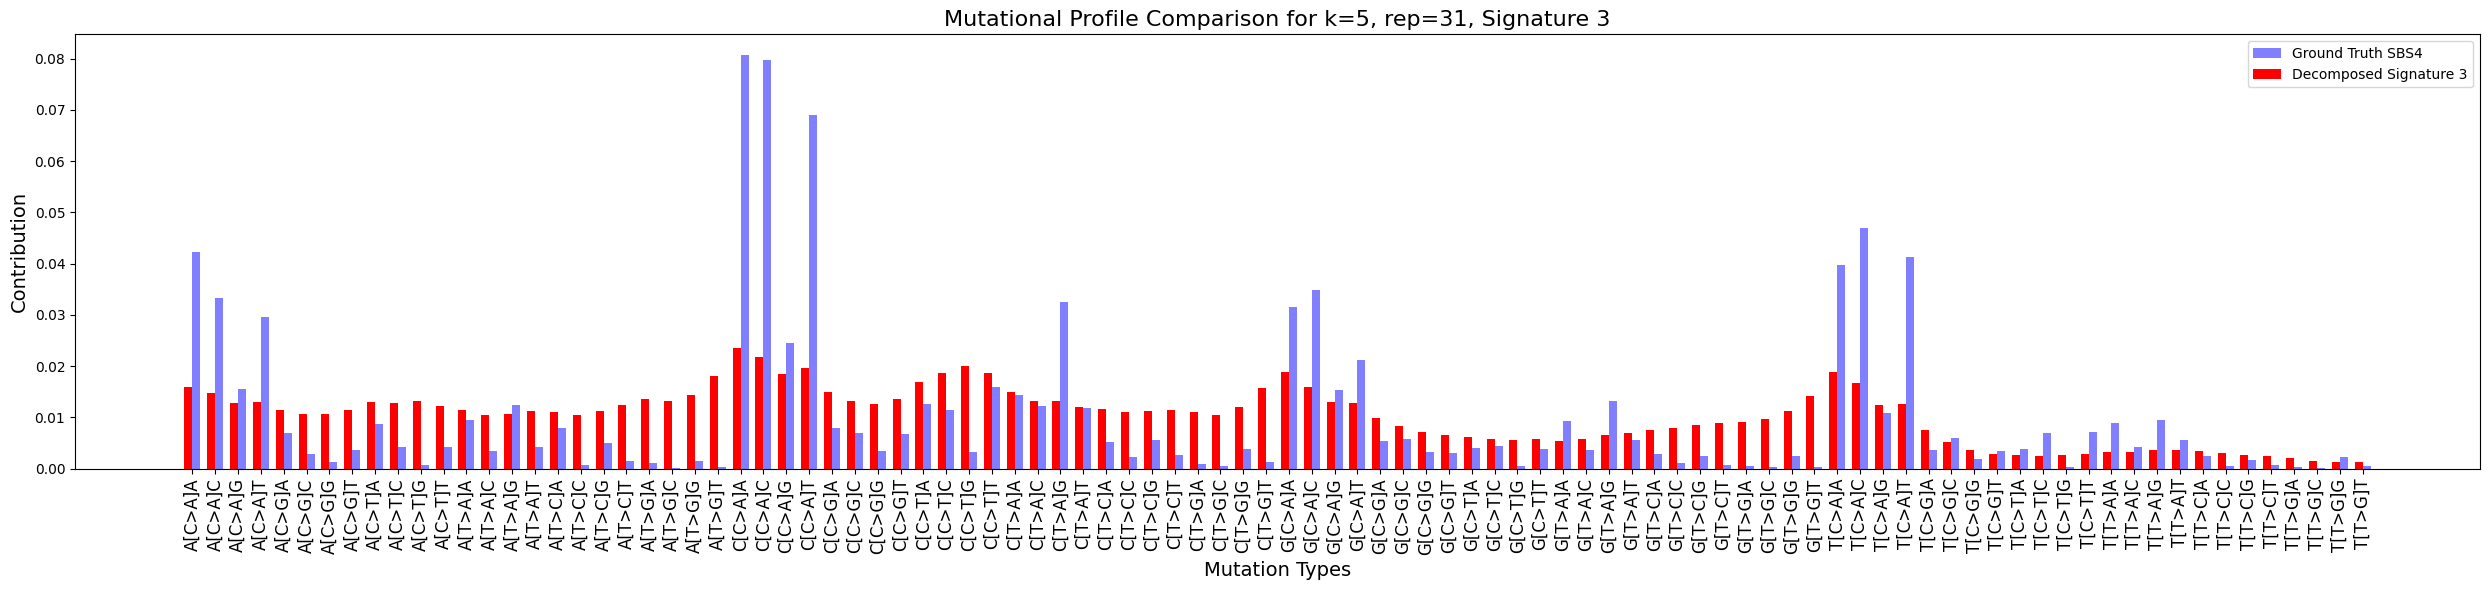

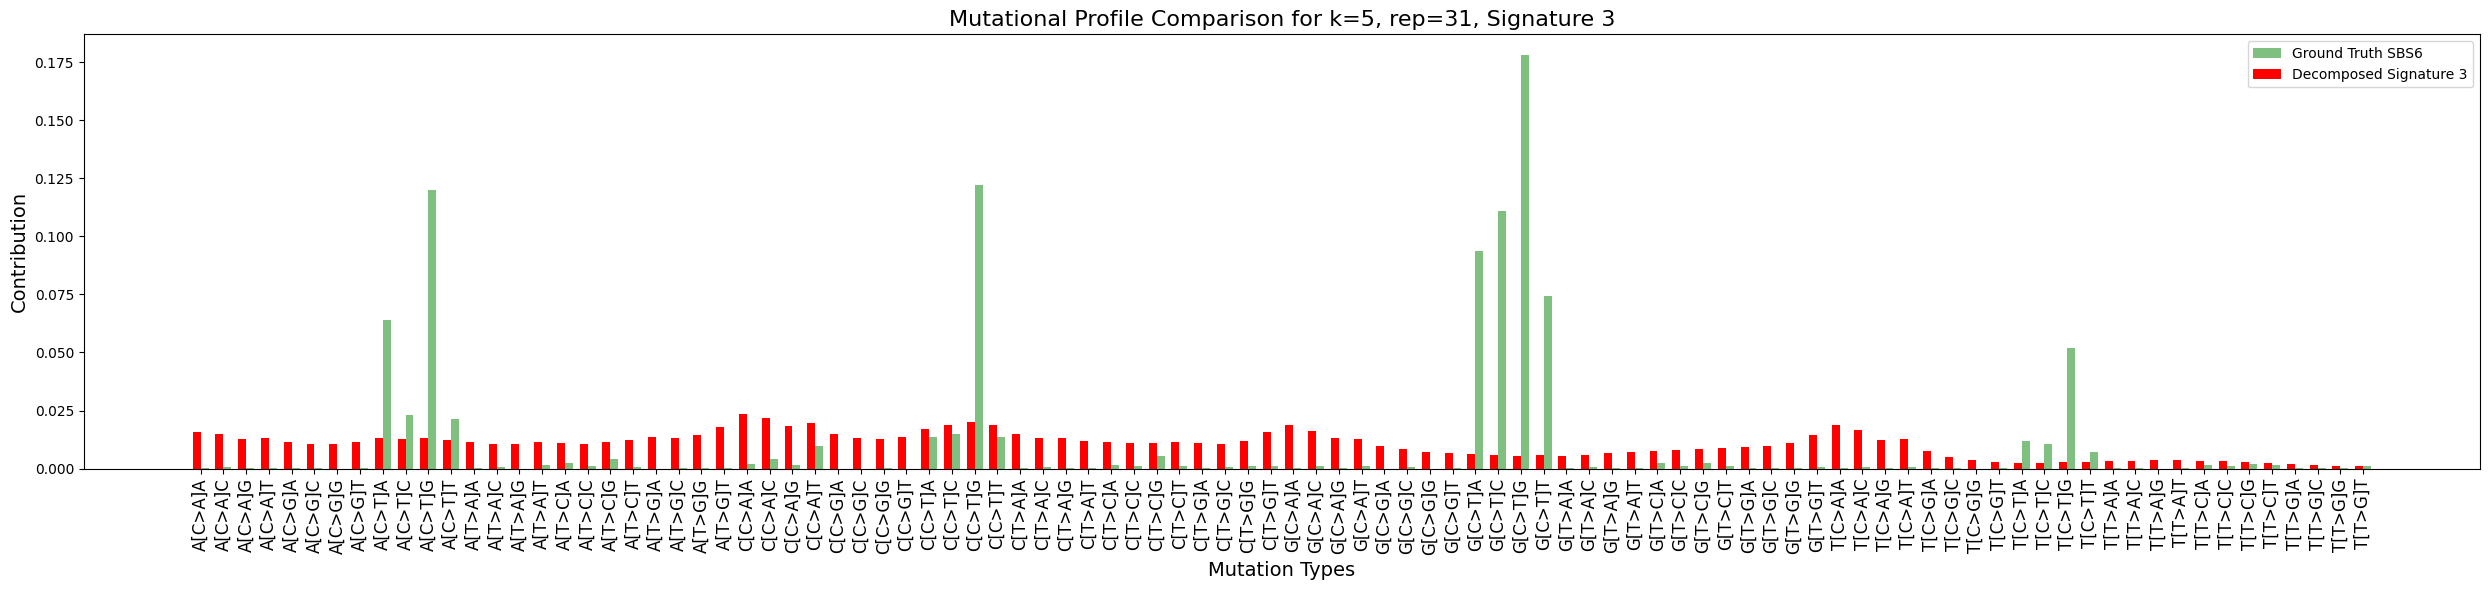

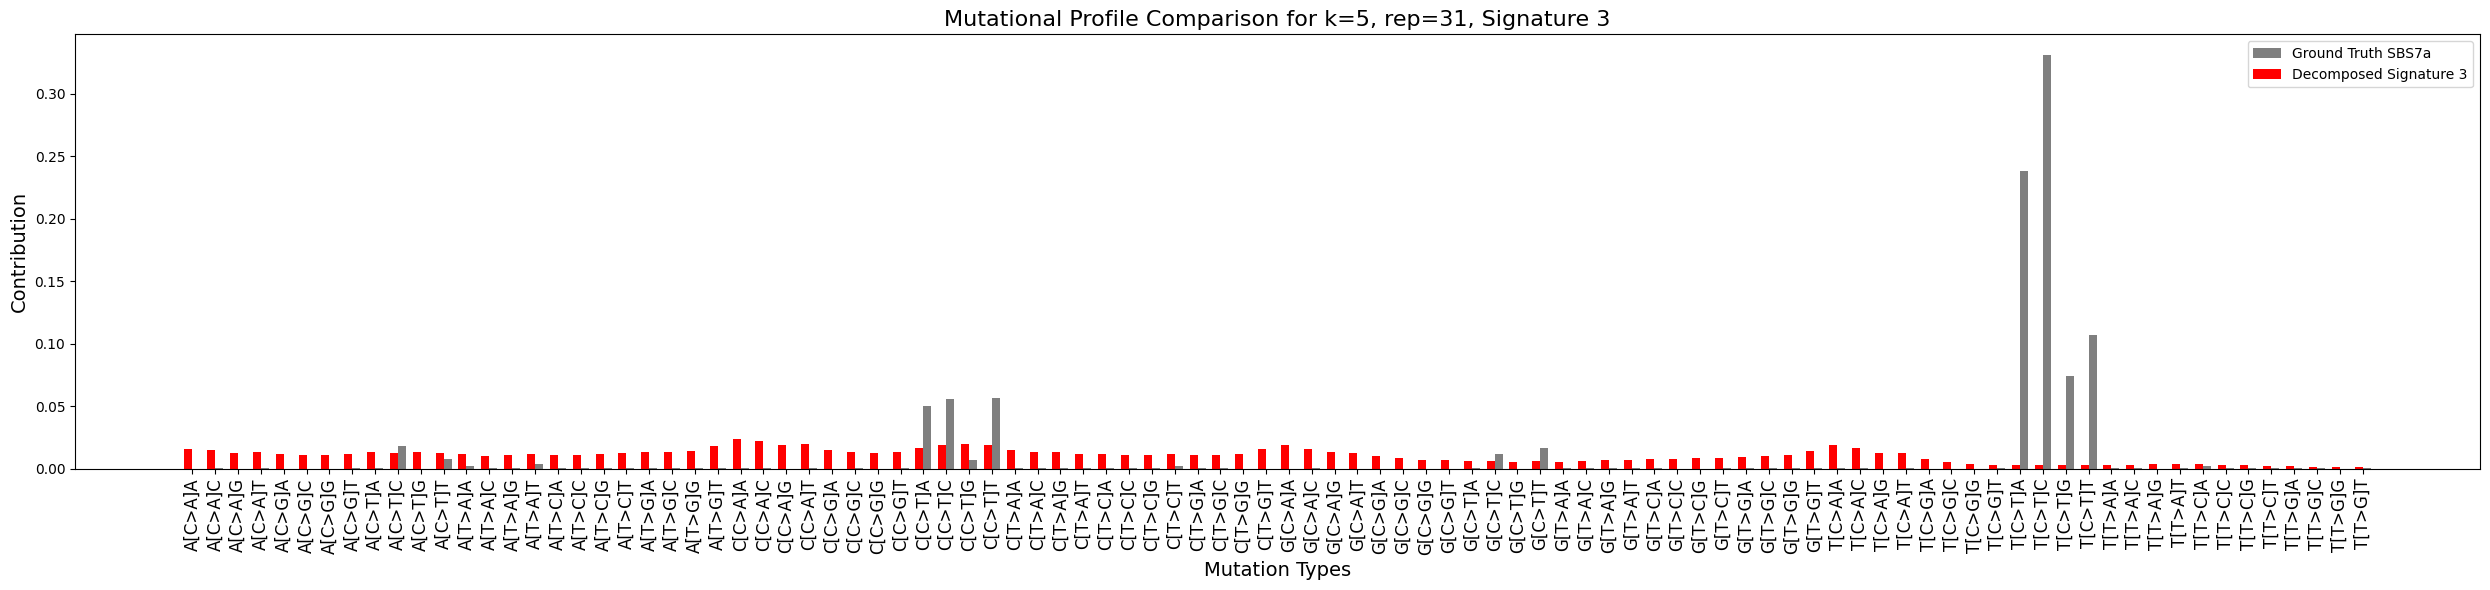

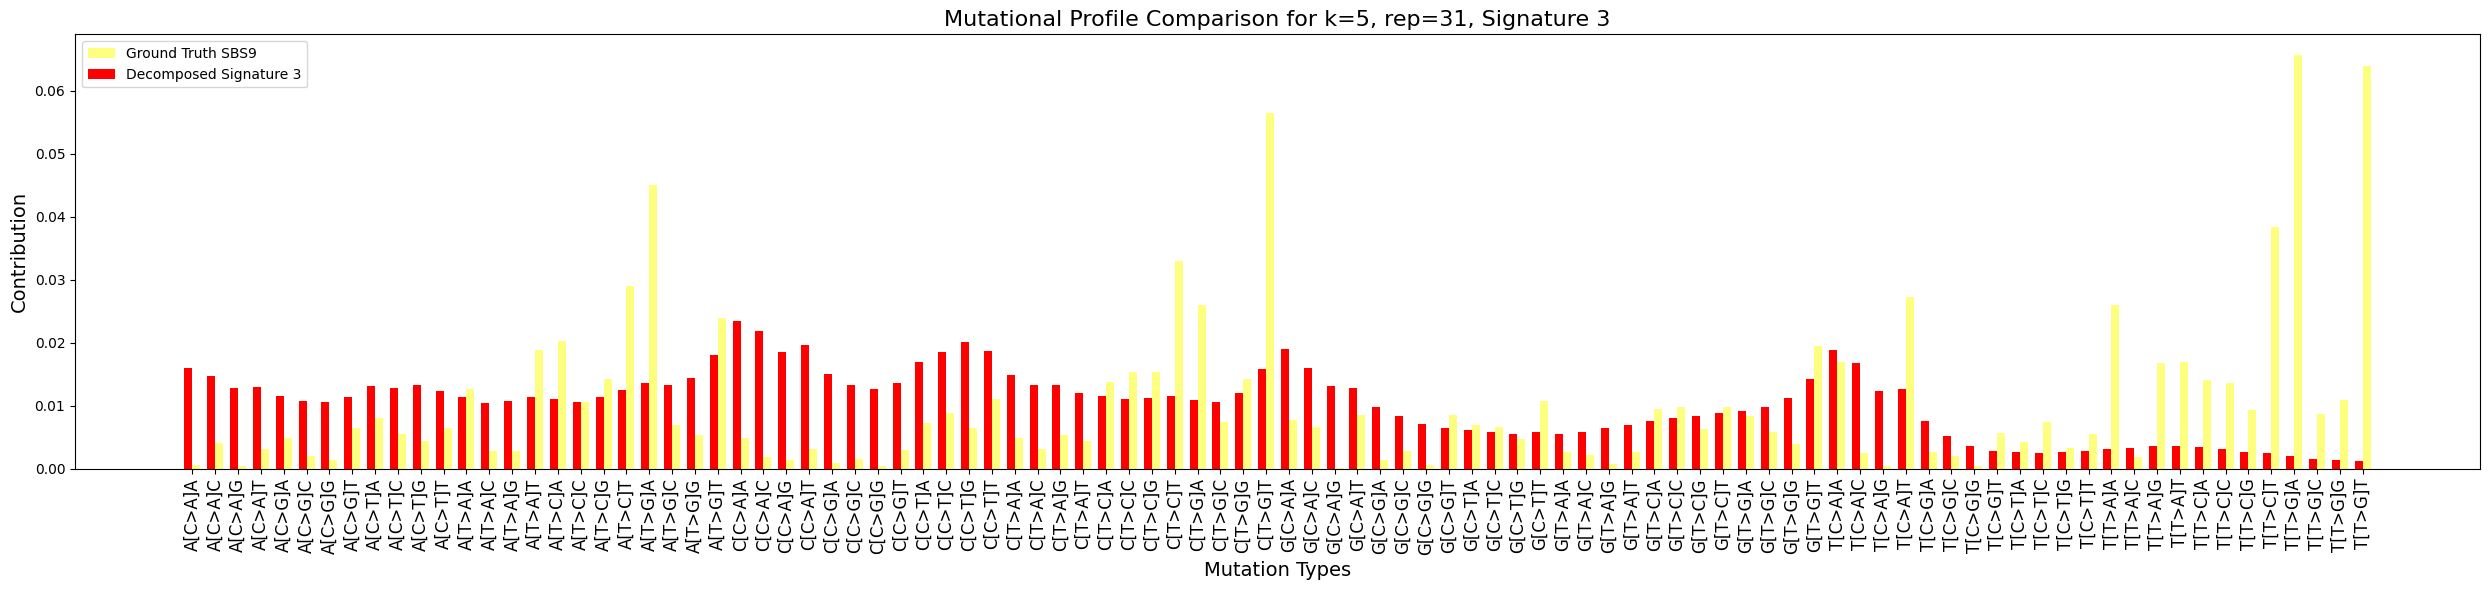

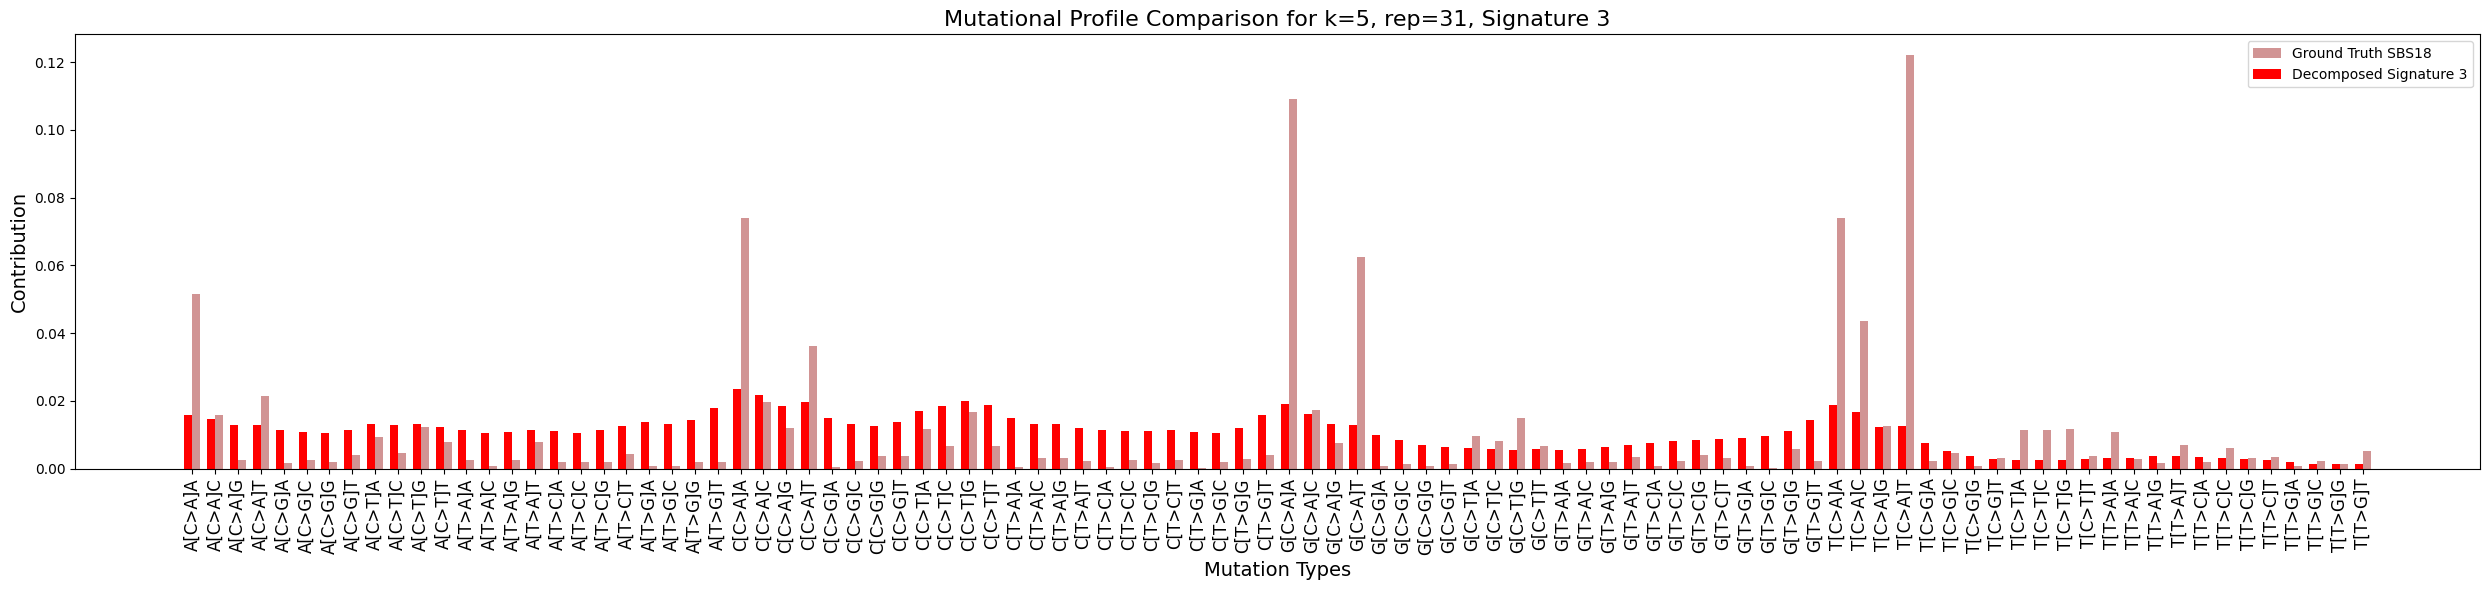

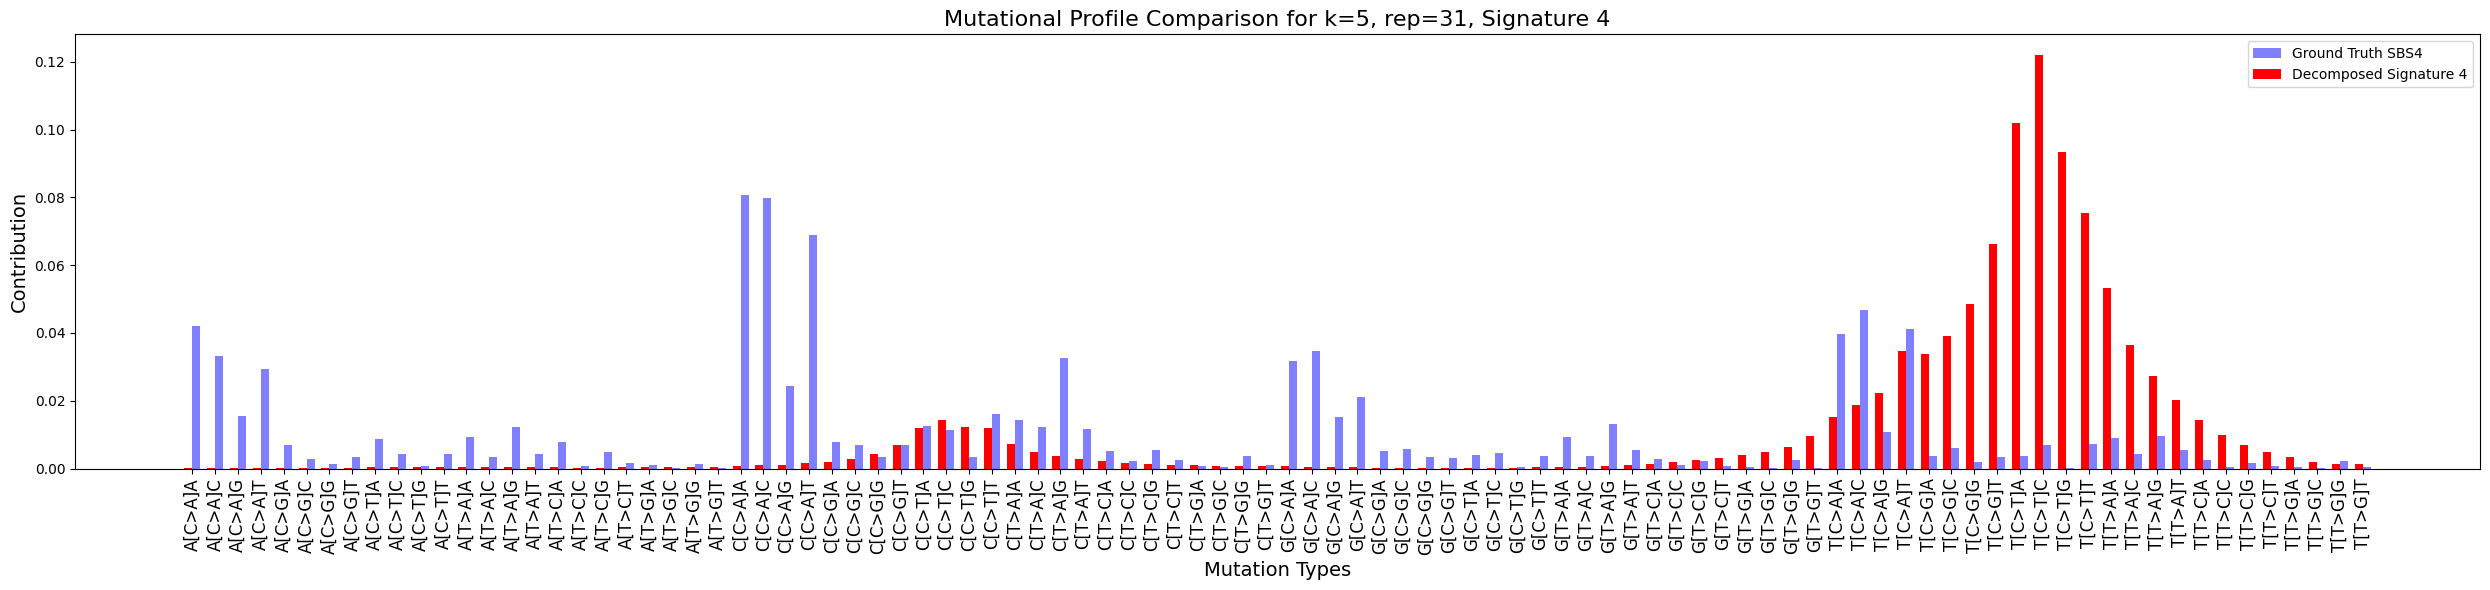

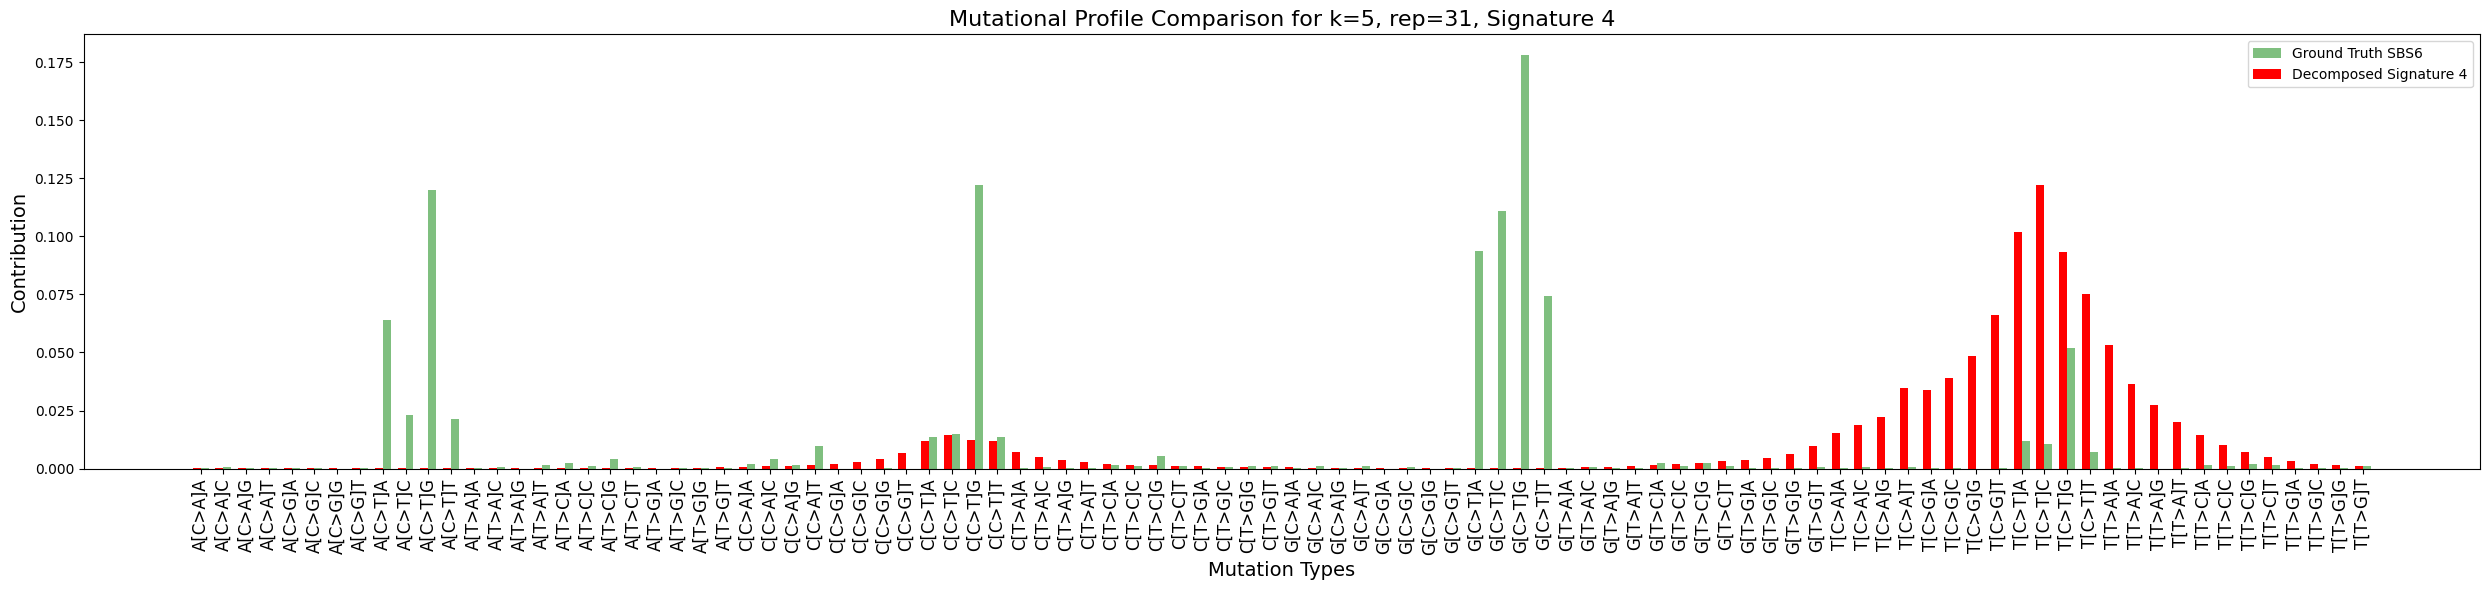

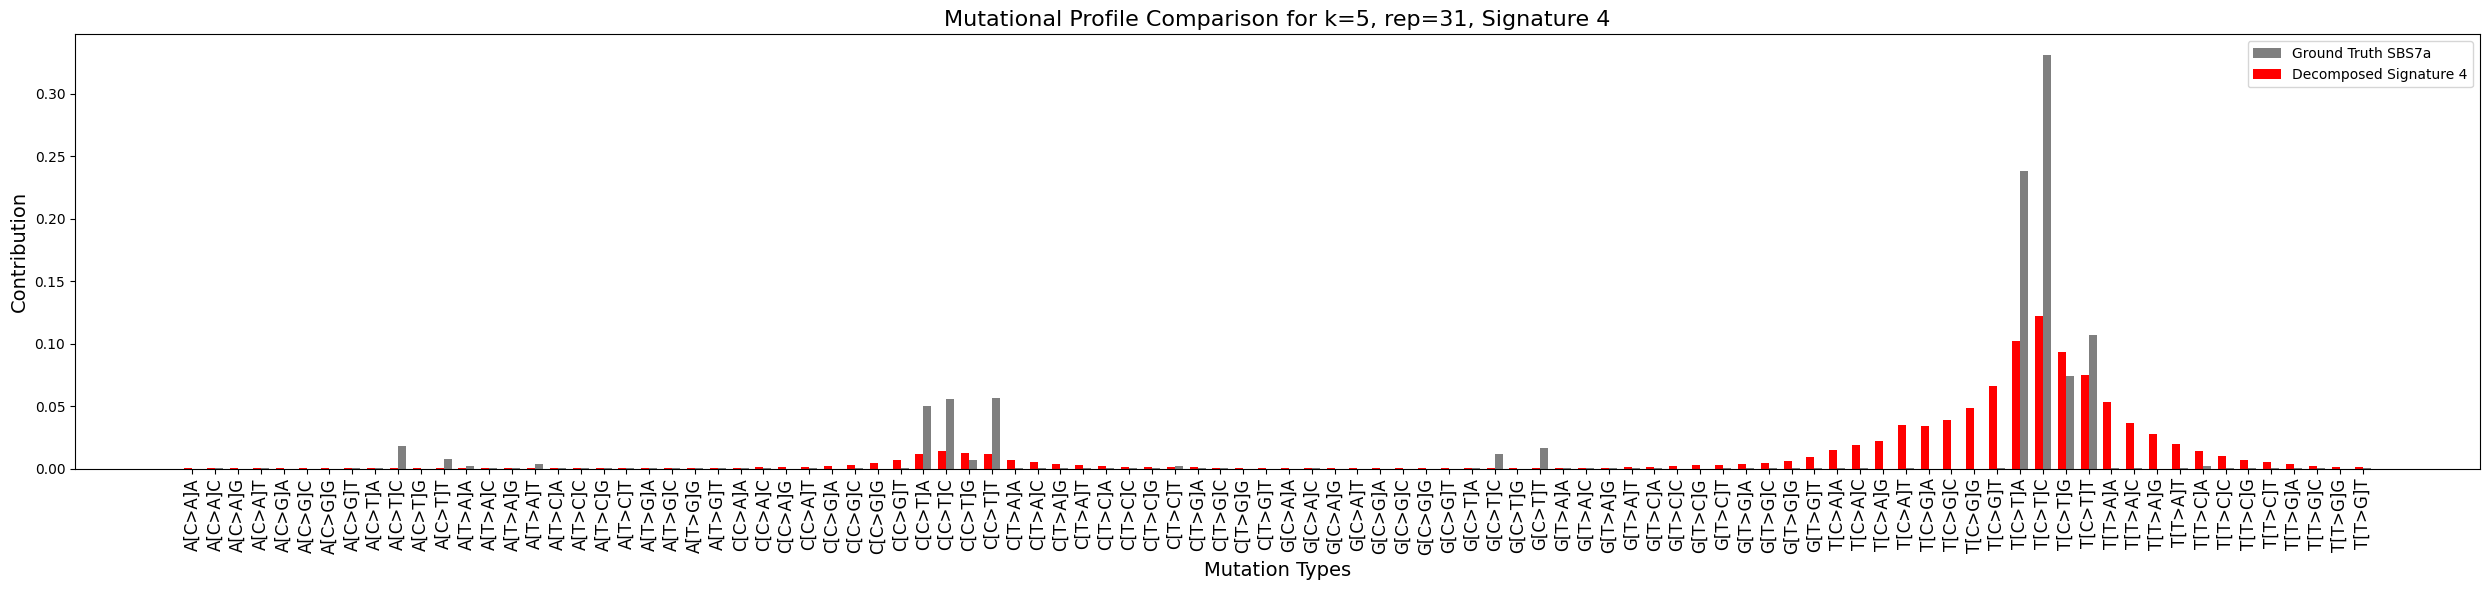

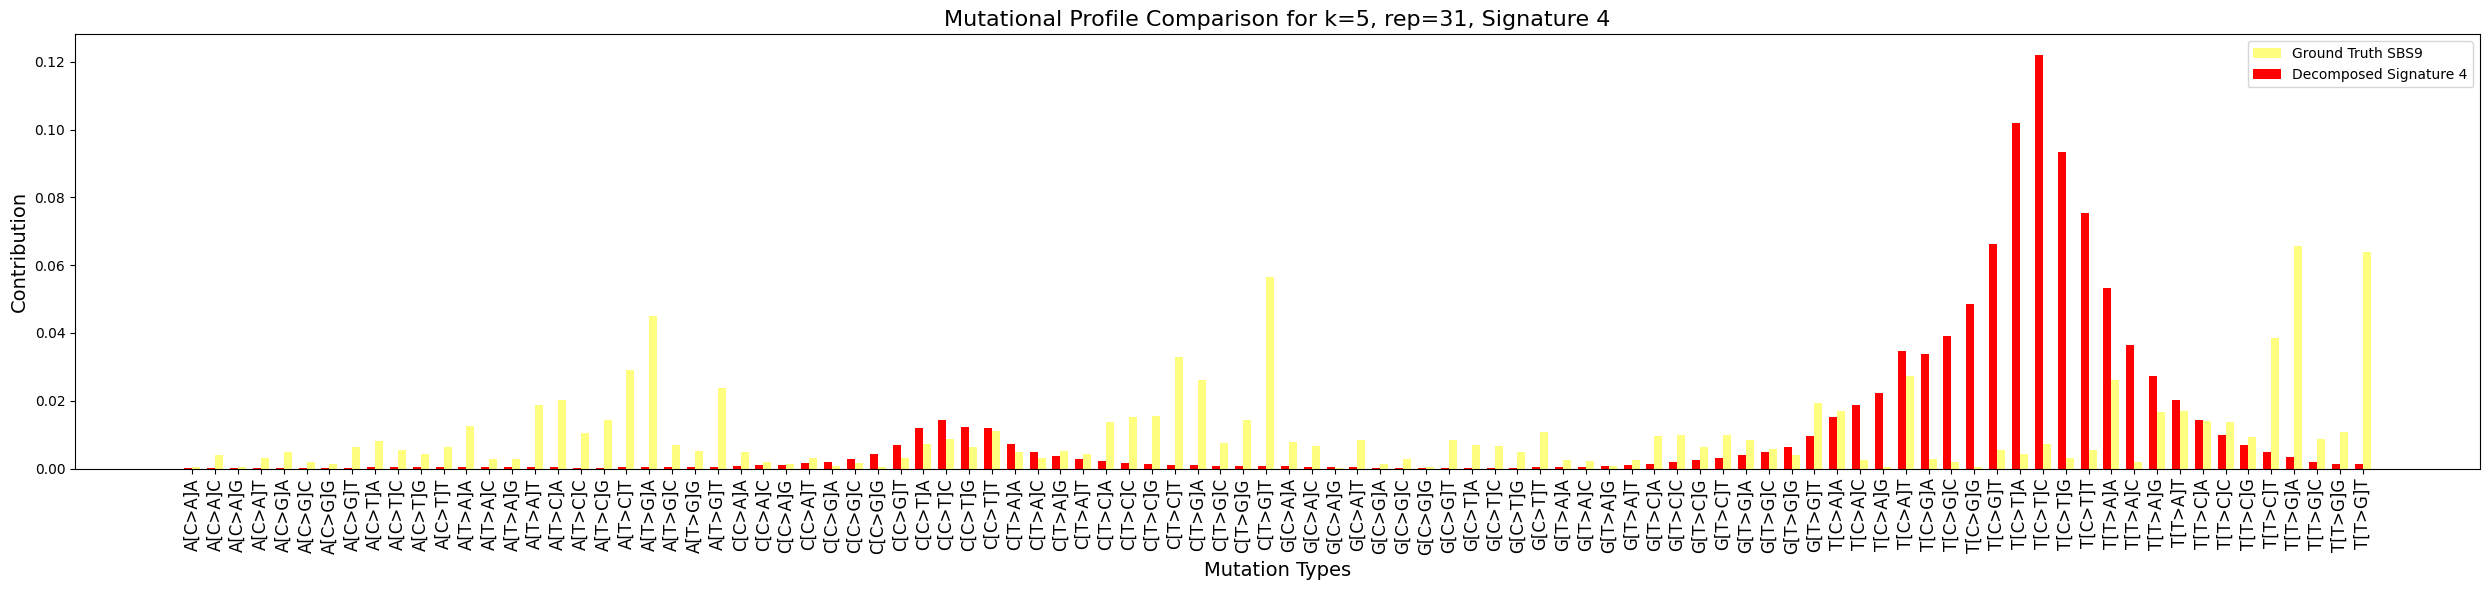

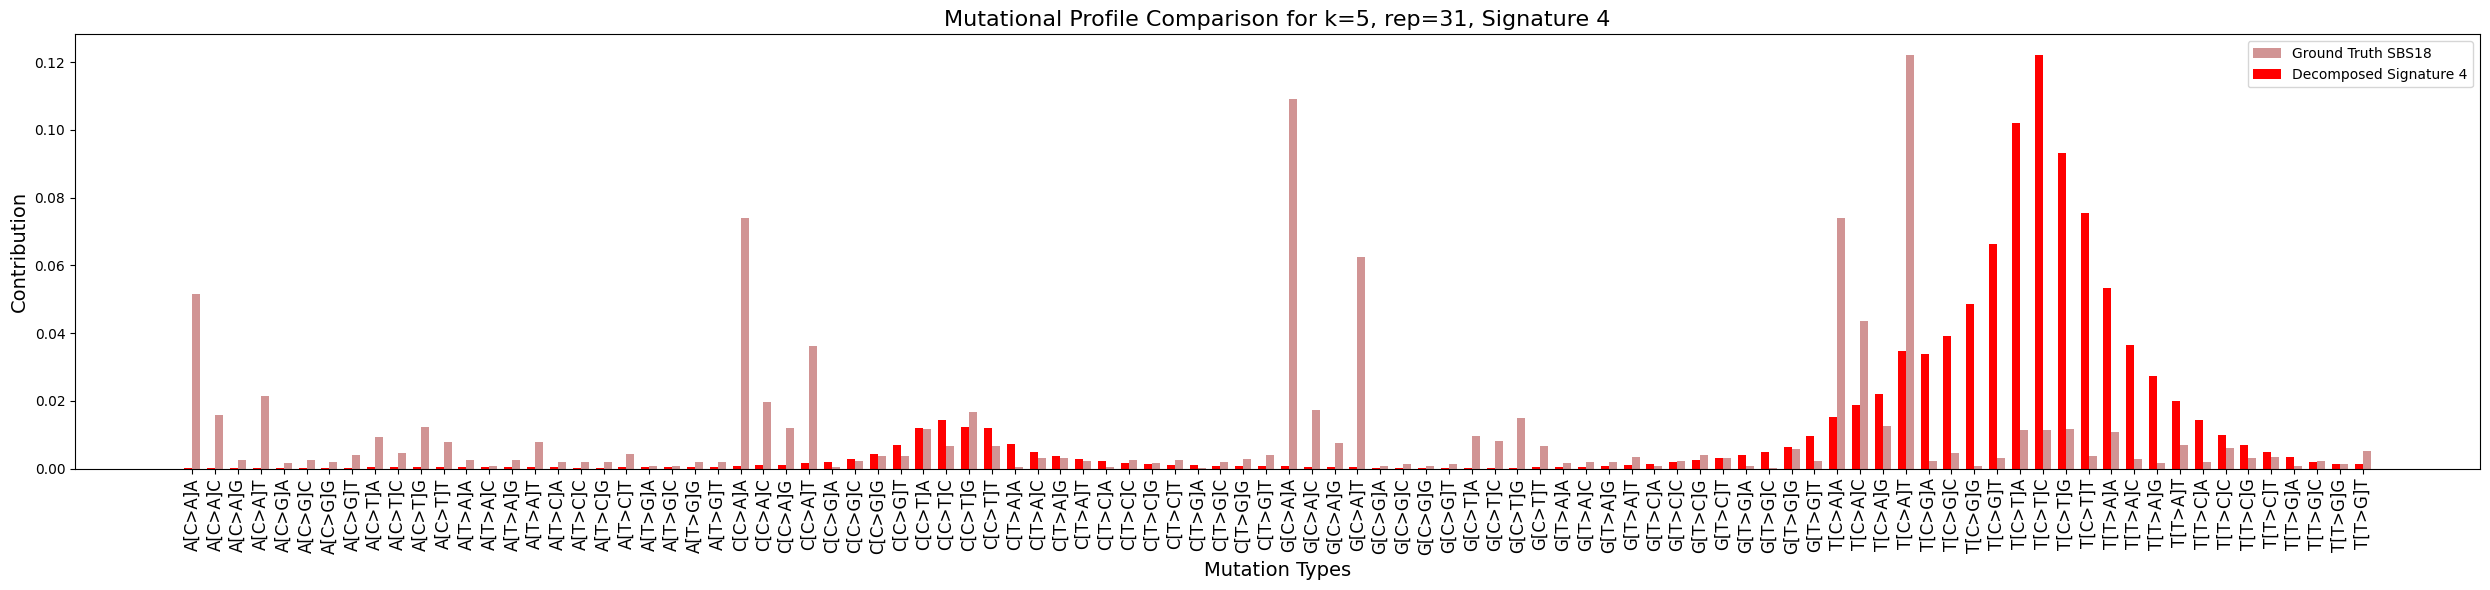

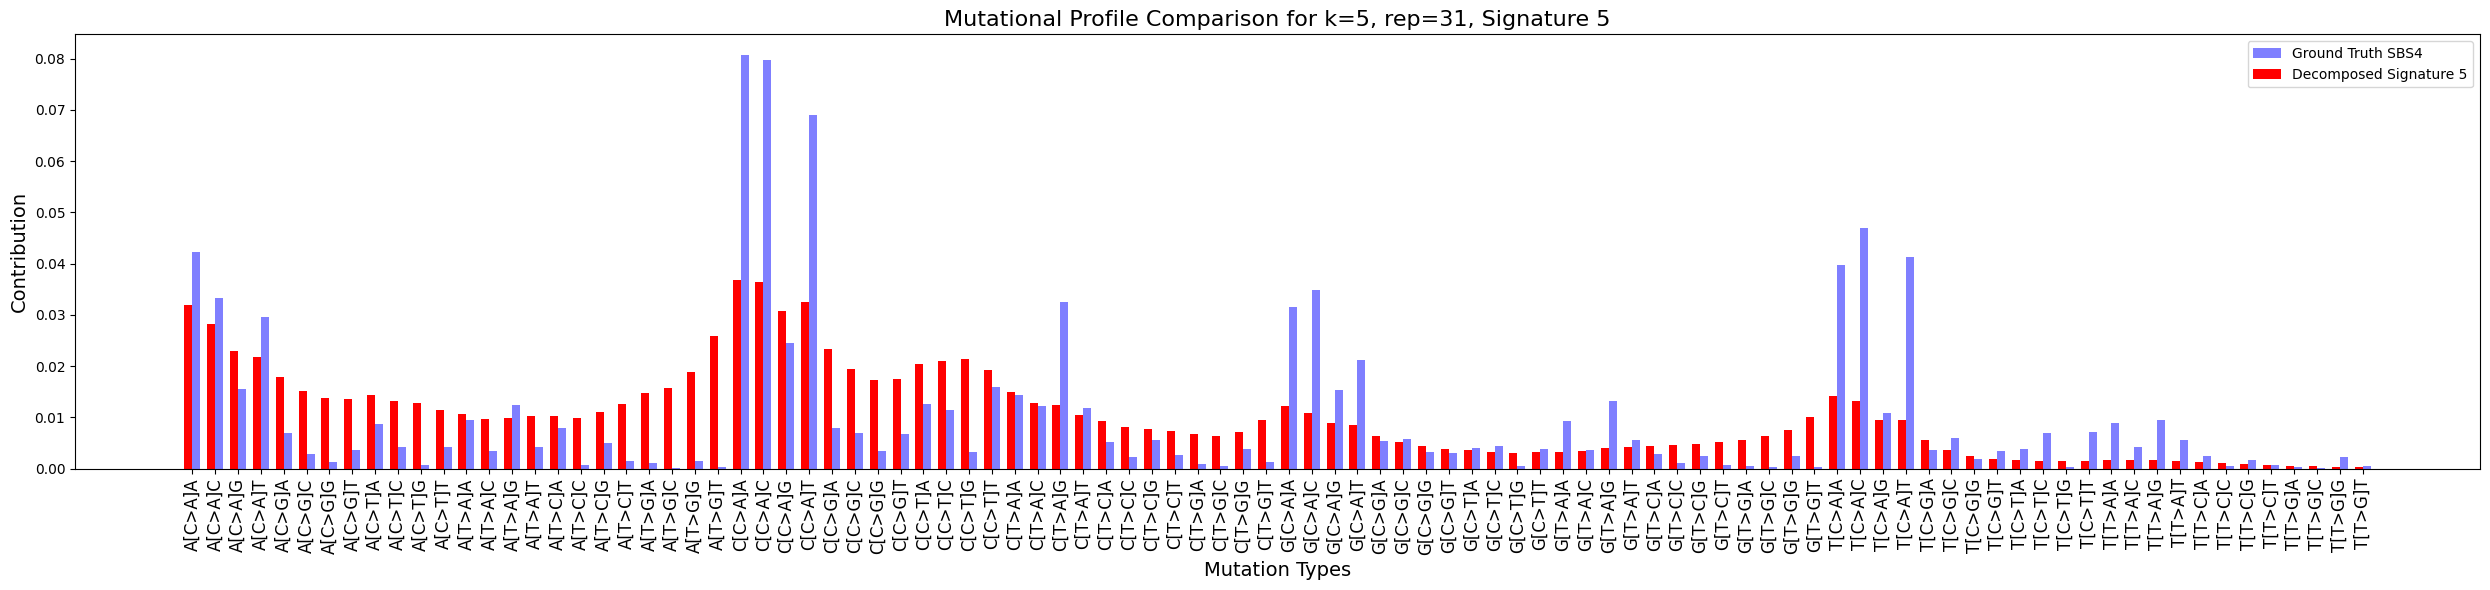

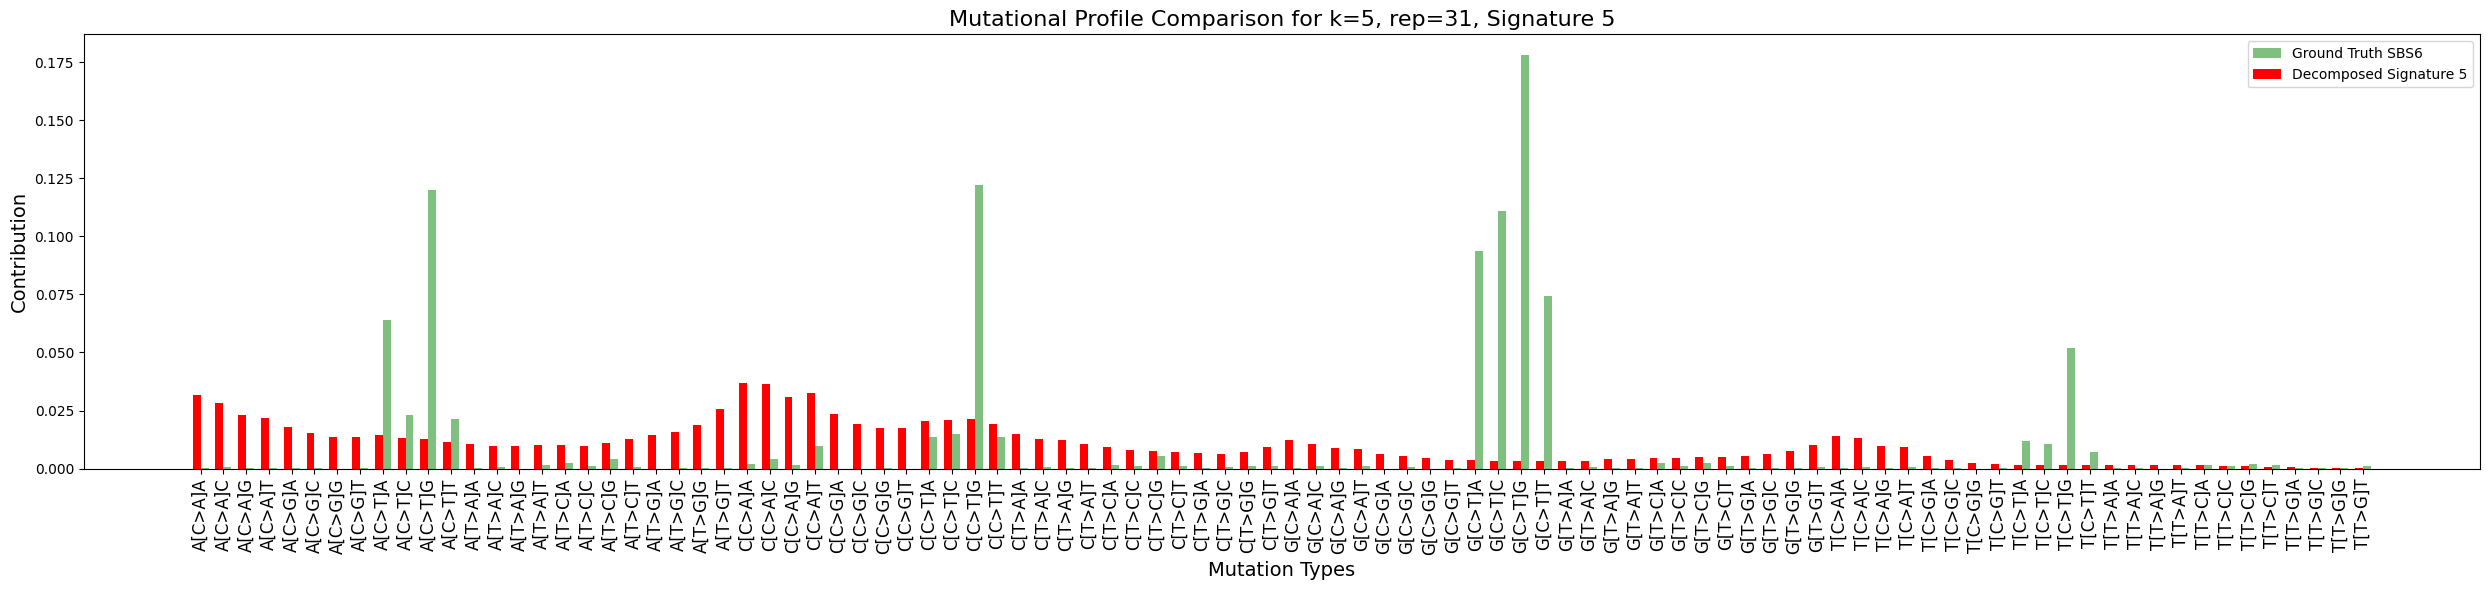

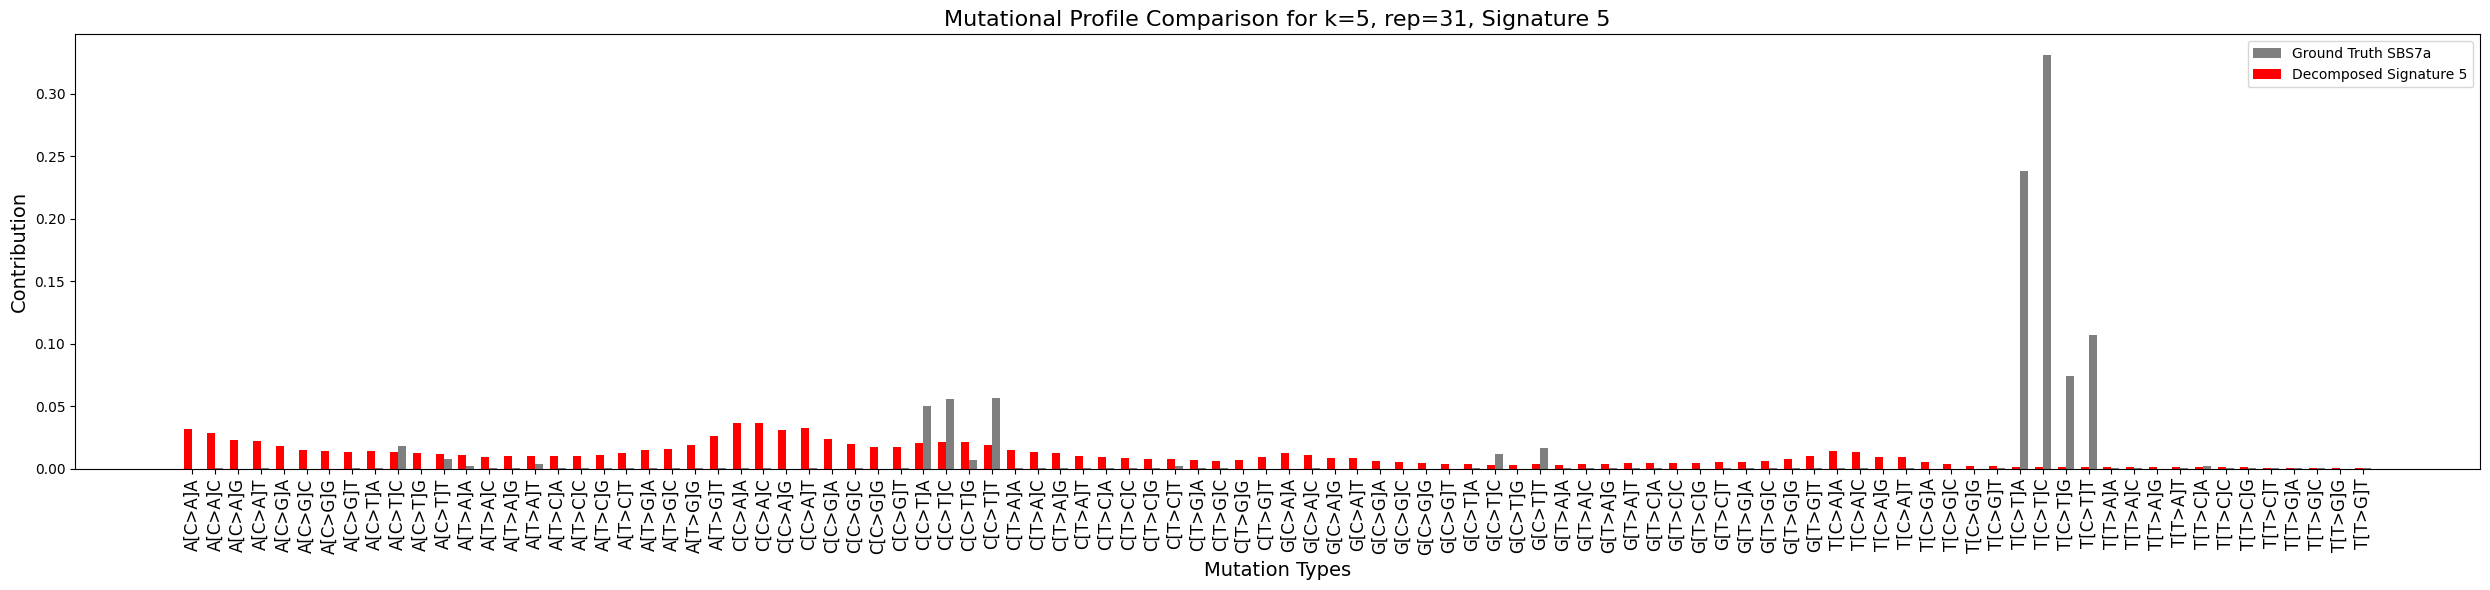

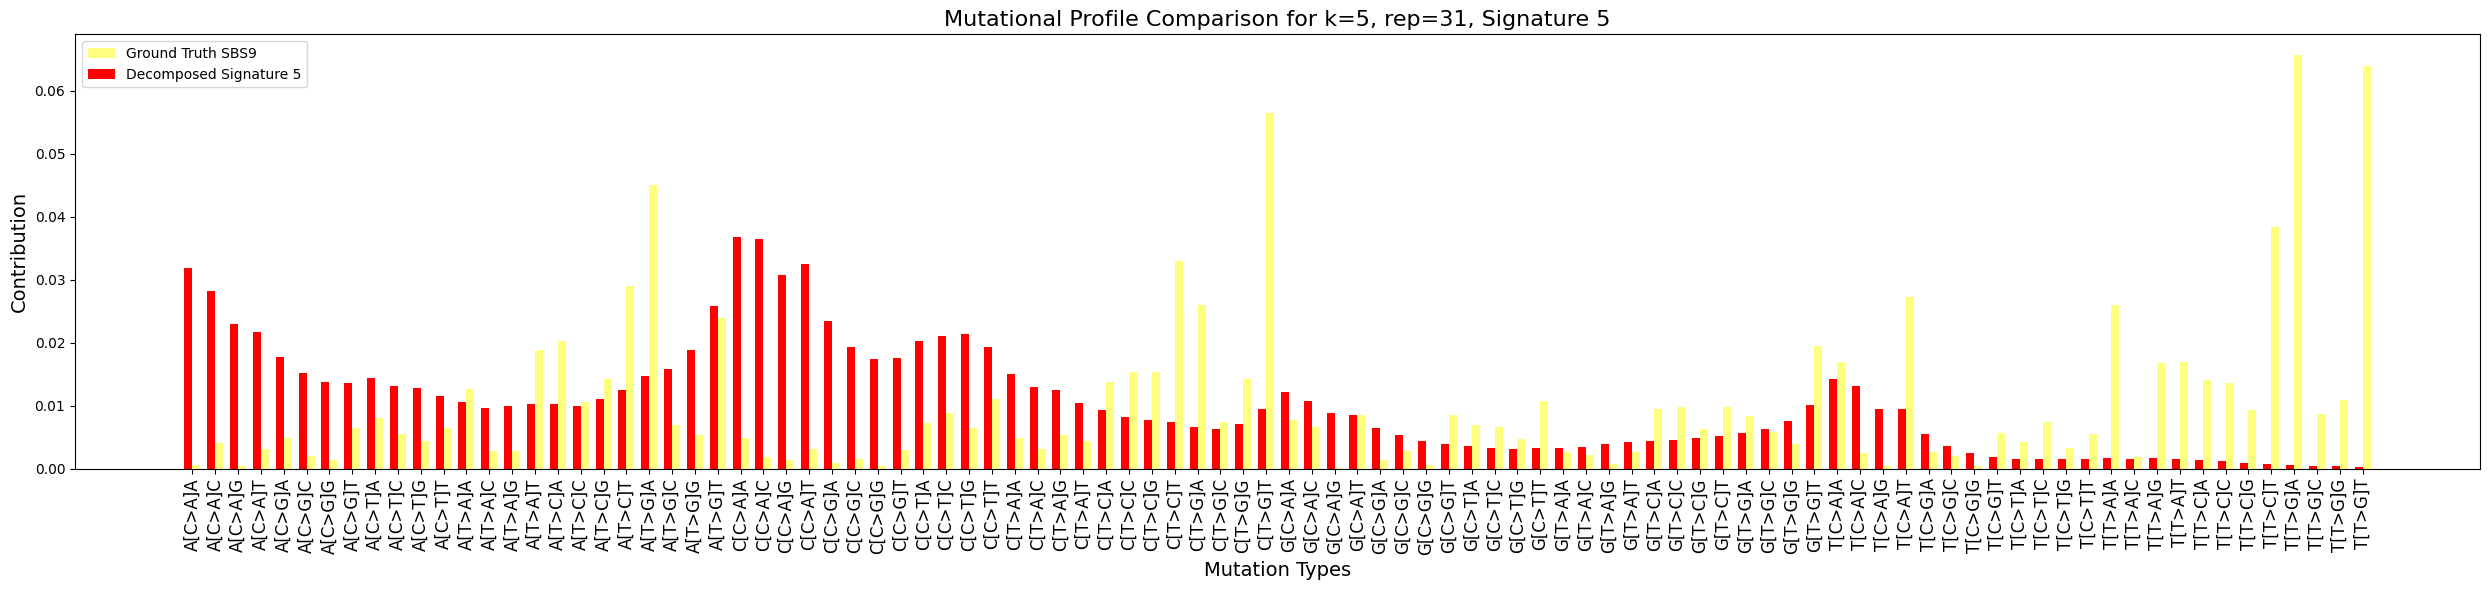

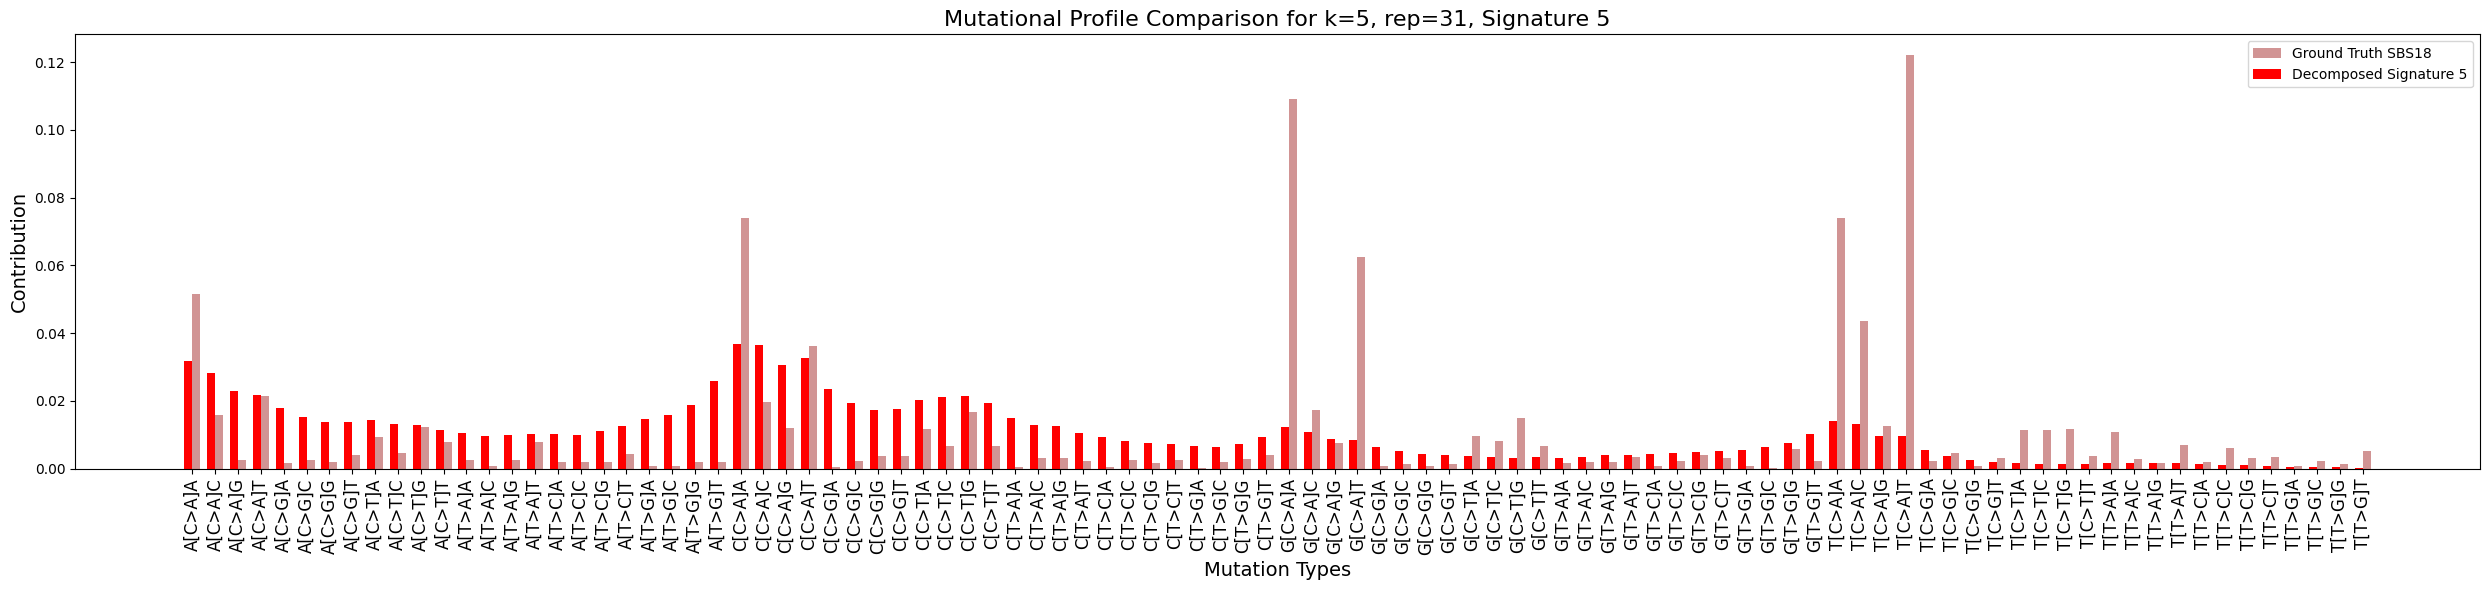

In [8]:
# Load the ground truth matrix
ground_truth = pd.read_csv(ground_truth_path, sep='\t', index_col=0)
M = pd.read_csv(M_path, header=None)
mutation_types = M.iloc[1:, 0].values  # Adjust indexing if necessary

# Load W matrix
W = pd.read_csv(W_path, header=None)
W = W.div(W.sum(axis=0), axis=1)
W.insert(0, "Mutation_Type", mutation_types)

# Plot each column in W
for i in range(1, W.shape[1]):
    decomposed_signature = W.iloc[:, i].values

    # Calculate Wasserstein distances and find the closest ground truth signature
    min_wass_distance = float('inf')
    selected_signature = None

    # Plot decomposed signature
    for signature,color in zip(['SBS4', 'SBS6', 'SBS7a', 'SBS9', 'SBS18'], ['b', 'g', 'black', 'yellow', 'brown']):
                    # Plotting
        plt.figure(figsize=(25, 6))
        bar_width = 0.35
        indices = np.arange(len(mutation_types))
        plt.bar(indices + bar_width, ground_truth[signature].values, bar_width, label=f'Ground Truth {signature}', alpha=0.5, color = color)
        plt.bar(indices, decomposed_signature, bar_width, label=f'Decomposed Signature {i}', alpha=1, color='r')

        # Plot closest ground truth signature
        
        plt.xlabel('Mutation Types', fontsize=14)
        plt.ylabel('Contribution', fontsize=14)
        plt.title(f'Mutational Profile Comparison for k={k}, rep={rep}, Signature {i}', fontsize=16)
        plt.xticks(indices + bar_width / 2, mutation_types, rotation=90, fontsize=12)
        plt.legend()
        plt.tight_layout()
    

    plt.show()